#  1. Carga de librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import random
plt.style.use('seaborn-v0_8-pastel')
sns.set_style("white")

# 2. Carga de dataset de Kindle y limpieza de datos

In [2]:
df = pd.read_csv("../data/BBDD_EDA/kindle_data-v2.csv")
df.head(3)


,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,https://m.media-amazon.com/images/I/713KZTsaYp...,https://www.amazon.com/dp/B00TZE87S4,4.8,0,9.99,False,6,True,False,False,2015-06-01,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/A1LZcJFs9E...,https://www.amazon.com/dp/B08WCKY8MB,4.4,0,16.99,False,6,False,False,False,2022-02-15,Parenting & Relationships
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,https://m.media-amazon.com/images/I/71RIWM0sv6...,https://www.amazon.com/dp/B09KPS84CJ,4.8,0,16.99,False,6,False,True,False,2022-09-13,Parenting & Relationships


In [3]:
def clean_dataset(df):
    df.drop(df[df["title"].isnull()].index, inplace=True)
    #df.drop(columns=['Unnamed: 0'], inplace=True)
    df = df.dropna(how="all", axis= 1)
    for column in df.columns:
        #print("Va por: ", column)
        if df[column].dtype == object:
            #print("tipo columna: ", df[column].dtype)
            df[column] = df[column].str.lower()
            df[column] = df[column].astype(str).str.strip()
            df.replace({'nan': np.nan}, inplace=True)
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    df.drop(df[df["title"].isnull()].index, inplace=True)
    df["author"] = np.where(df["author"] == "", "unknown", df["author"])  
    # para crear columna de año a partir de la de fecha de publicacion
    df["published_year"] = df["publisheddate"].str.split("-").str[0]
    df["published_year"] = df["published_year"].astype("Int64")
    # Nueva columna de rangos de décadas
    bins = [-float('inf'), 1989, 1994, 1999, 2004, 2009, 2014, 2019, float('inf')]
    labels = ['before 1990', '1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2015-2019', 'after 2019']
    df['year_range'] = pd.cut(df['published_year'], bins=bins, labels=labels)
    # para crear ranking por categoría
    # df_ranking = df.copy()
    # categories = df["category_name"].unique()
    # for categorie in categories:
    #     #print(categorie)
    #     df_categorie = df[df["category_name"] == categorie].copy()
    #     df_categorie = df_categorie.sort_values(by= ["reviews"], ascending= False)
    #     df_categorie["ranking_" + str(categorie)] = range(1, len(df_categorie) + 1)
    #     df_ranking = pd.merge(df_ranking,df_categorie, how="left")
    return df

df_kd = clean_dataset(df)  


In [4]:
df_kd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133102 entries, 0 to 133101
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   asin               133102 non-null  object  
 1   title              133102 non-null  object  
 2   author             132677 non-null  object  
 3   soldby             123869 non-null  object  
 4   imgurl             133102 non-null  object  
 5   producturl         133102 non-null  object  
 6   stars              133102 non-null  float64 
 7   reviews            133102 non-null  int64   
 8   price              133102 non-null  float64 
 9   iskindleunlimited  133102 non-null  bool    
 10  category_id        133102 non-null  int64   
 11  isbestseller       133102 non-null  bool    
 12  iseditorspick      133102 non-null  bool    
 13  isgoodreadschoice  133102 non-null  bool    
 14  publisheddate      84086 non-null   object  
 15  category_name      133102 non-null

In [5]:
# Inclusión de columna ranking que indica la posición actual de cada libro.
ranking = list(range(1,len(df_kd)+1))
df_kd["ranking_posic_inic"] = ranking
df_kd.head(3)

,asin,title,author,soldby,imgurl,producturl,stars,reviews,price,iskindleunlimited,category_id,isbestseller,iseditorspick,isgoodreadschoice,publisheddate,category_name,published_year,year_range,ranking_posic_inic
0,b00tze87s4,adult children of emotionally immature parents...,lindsay c. gibson,amazon.com services llc,https://m.media-amazon.com/images/i/713kztsayp...,https://www.amazon.com/dp/b00tze87s4,4.8,0,9.99,False,6,True,False,False,2015-06-01,parenting & relationships,2015,2015-2019,1
1,b08wcky8mb,"from strength to strength: finding success, ha...",arthur c. brooks,penguin group (usa) llc,https://m.media-amazon.com/images/i/a1lzcjfs9e...,https://www.amazon.com/dp/b08wcky8mb,4.4,0,16.99,False,6,False,False,False,2022-02-15,parenting & relationships,2022,after 2019,2
2,b09kps84cj,good inside: a guide to becoming the parent yo...,becky kennedy,harpercollins publishers,https://m.media-amazon.com/images/i/71riwm0sv6...,https://www.amazon.com/dp/b09kps84cj,4.8,0,16.99,False,6,False,True,False,2022-09-13,parenting & relationships,2022,after 2019,3


In [6]:
# al ver los duplicados han aparecido estas filas con título "not found", eliminar.
df_kd[df_kd["title"] == "not found"]

,asin,title,author,soldby,imgurl,producturl,stars,reviews,price,iskindleunlimited,category_id,isbestseller,iseditorspick,isgoodreadschoice,publisheddate,category_name,published_year,year_range,ranking_posic_inic
27975,b0c6jgj7rj,not found,NaN,NaN,no image found,https://www.amazon.com/dp/b0c6jgj7rj,0.0,0,0.0,False,26,False,False,False,NaN,"crafts, hobbies & home",<NA>,NaN,27976
132490,b07n5jq1j5,not found,NaN,NaN,no image found,https://www.amazon.com/dp/b07n5jq1j5,0.0,0,0.0,False,25,False,False,False,NaN,children's ebooks,<NA>,NaN,132491


In [7]:
df_kd.drop(index = [27975, 132490], inplace=True)

In [8]:
df_kd[df_kd["title"] == "not found"]

,asin,title,author,soldby,imgurl,producturl,stars,reviews,price,iskindleunlimited,category_id,isbestseller,iseditorspick,isgoodreadschoice,publisheddate,category_name,published_year,year_range,ranking_posic_inic


In [9]:
# para eliminar duplicados
df_duplicated = df_kd[df_kd["title"].duplicated()].sort_values(by= "author", ascending= True)

In [10]:
df_kd.drop(df_duplicated[df_duplicated["author"] == "Unknown"].index, inplace= True)

In [11]:
# para eliminar duplicados quedándonos con el primer año de publicación del mismo título
df_kd.sort_values(by="published_year", inplace=True)
df_kd.drop_duplicates("title", inplace=True)

In [12]:
# para eliminar todos aquellos que no tengan año de publicación
df_kd["published_year"].isnull()
df_kd.dropna(subset=["published_year"], inplace= True)

In [13]:
# para eliminar columnas innecesarias
df_kd.drop(df_kd.loc[:,["imgurl", "producturl","category_id","iseditorspick", "isgoodreadschoice"]], axis=1, inplace = True)

In [14]:
df_kd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83102 entries, 130517 to 128116
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   asin                83102 non-null  object  
 1   title               83102 non-null  object  
 2   author              83013 non-null  object  
 3   soldby              77038 non-null  object  
 4   stars               83102 non-null  float64 
 5   reviews             83102 non-null  int64   
 6   price               83102 non-null  float64 
 7   iskindleunlimited   83102 non-null  bool    
 8   isbestseller        83102 non-null  bool    
 9   publisheddate       83102 non-null  object  
 10  category_name       83102 non-null  object  
 11  published_year      83102 non-null  Int64   
 12  year_range          83102 non-null  category
 13  ranking_posic_inic  83102 non-null  int64   
dtypes: Int64(1), bool(2), category(1), float64(2), int64(2), object(6)
memory usage: 7.9+

In [15]:
# Para generar variable top_10 de categorías
top_10_categories = df_kd["category_name"].value_counts().nlargest(10).index
df_kd['category_top_10'] =  np.nan
df_kd['category_top_10'] = np.where(df_kd['category_name'].isna(), np.nan, np.where(df_kd['category_name'].isin(top_10_categories), df_kd['category_name'], 'others'))

In [16]:
df_kd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83102 entries, 130517 to 128116
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   asin                83102 non-null  object  
 1   title               83102 non-null  object  
 2   author              83013 non-null  object  
 3   soldby              77038 non-null  object  
 4   stars               83102 non-null  float64 
 5   reviews             83102 non-null  int64   
 6   price               83102 non-null  float64 
 7   iskindleunlimited   83102 non-null  bool    
 8   isbestseller        83102 non-null  bool    
 9   publisheddate       83102 non-null  object  
 10  category_name       83102 non-null  object  
 11  published_year      83102 non-null  Int64   
 12  year_range          83102 non-null  category
 13  ranking_posic_inic  83102 non-null  int64   
 14  category_top_10     83102 non-null  object  
dtypes: Int64(1), bool(2), category(1), 

In [17]:
# creación de un ranking según el número de reviews por categoría.
categories = df_kd["category_top_10"].unique()
for categorie in categories:
    #print(categorie)
    df_categorie = df_kd[df_kd["category_top_10"] == categorie].copy()
    df_categorie = df_categorie.sort_values(by= ["reviews"], ascending= False)
    df_categorie["ranking_" + str(categorie)] = range(1, len(df_categorie) + 1)
    #print(len(df_categorie))
    df_kd = pd.merge(df_kd,df_categorie, how="left")


# Análisis con Kindle
Desde este dataset, vamos a sacar un histograma con la evolución de los títulos publicados por década (year_range)

In [18]:
# para una primera hipótesis, vamos a cargar el dataset filtrado anterior en una nueva variable
df_kd_h1 = df_kd.copy()

In [19]:
df_kd_h1.head(1)

,asin,title,author,soldby,stars,reviews,price,iskindleunlimited,isbestseller,publisheddate,...,ranking_science & math,ranking_others,ranking_biographies & memoirs,"ranking_crafts, hobbies & home",ranking_travel,ranking_parenting & relationships,ranking_law,ranking_engineering & transportation,"ranking_cookbooks, food & wine",ranking_computers & technology
0,b01k3lk4kg,percy jackson's greek gods by rick riordan (20...,NaN,NaN,4.8,0,14.9,False,False,1806-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Primero ordenamos los datos por año de publi, por si estuvieran desordenados
df_kd_h1.sort_values("published_year", ascending= True, inplace=True)

In [21]:
df_kd_h1.head(1)

,asin,title,author,soldby,stars,reviews,price,iskindleunlimited,isbestseller,publisheddate,...,ranking_science & math,ranking_others,ranking_biographies & memoirs,"ranking_crafts, hobbies & home",ranking_travel,ranking_parenting & relationships,ranking_law,ranking_engineering & transportation,"ranking_cookbooks, food & wine",ranking_computers & technology
0,b01k3lk4kg,percy jackson's greek gods by rick riordan (20...,NaN,NaN,4.8,0,14.9,False,False,1806-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [257]:
# Para graficar los datos referidos a publicaciones totales por década.
titles_decade_count = df_kd_h1.groupby("year_range")["title"].count().reset_index(name='title_count')

C:\Users\anusk\AppData\Local\Temp\ipykernel_24260\199855805.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titles_decade_count = df_kd_h1.groupby("year_range")["title"].count().reset_index(name='title_count')


In [258]:
titles_decade_count

,year_range,title_count
0,before 1990,279
1,1990-1994,186
2,1995-1999,437
3,2000-2004,1348
4,2005-2009,4746
5,2010-2014,13478
6,2015-2019,22520
7,after 2019,40108


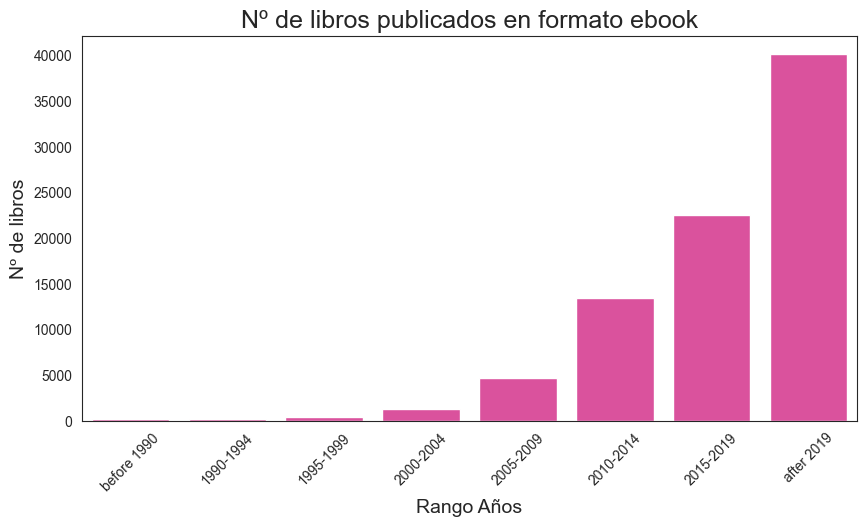

In [259]:
plt.figure(figsize=(10,5))
sns.barplot(titles_decade_count, x = "year_range", y = "title_count", color="#F03C9F")
plt.xticks(rotation= 45)
plt.title('Nº de libros publicados en formato ebook', fontsize=18)
plt.xlabel('Rango Años', fontsize=14)
plt.ylabel('Nº de libros', fontsize=14);

Otros análisis desde este dataset:

Primero vamos a obtener el número de libros publicado por género por cada década

In [25]:
generos_decada = df_kd_h1.groupby(["year_range","category_top_10"])["title"].size().reset_index(name='counts')

C:\Users\anusk\AppData\Local\Temp\ipykernel_24260\1523664628.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  generos_decada = df_kd_h1.groupby(["year_range","category_top_10"])["title"].size().reset_index(name='counts')


In [26]:
generos_decada_piv = generos_decada.pivot(index='year_range', columns='category_top_10', values='counts')

In [27]:
# para ordenar los valores
category_totals = generos_decada_piv.sum().sort_values(ascending=False)
generos_decada_piv  = generos_decada_piv [category_totals.index]

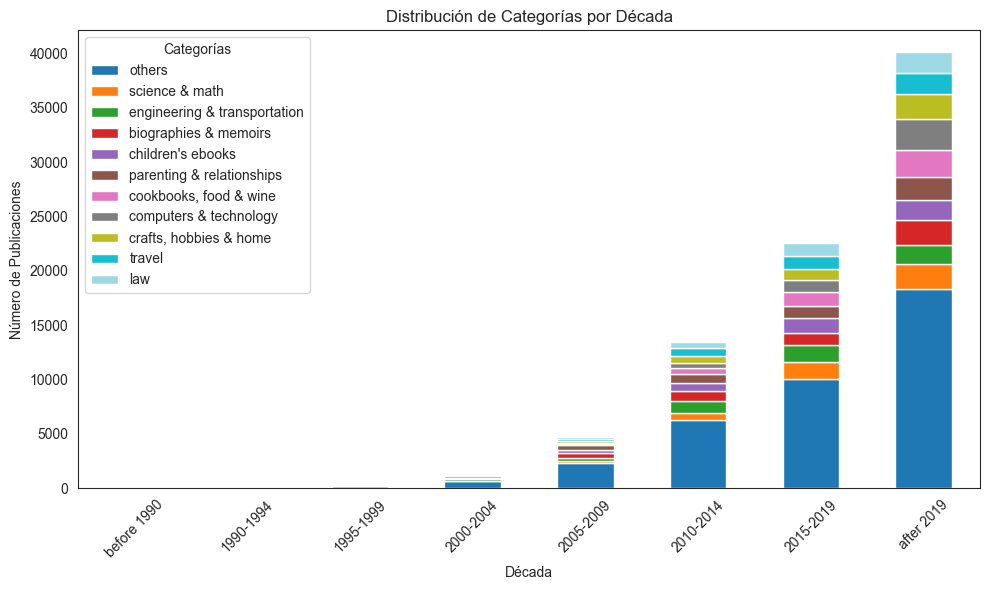

In [28]:
generos_decada_piv.plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")
plt.title('Distribución de Categorías por Década')
plt.ylabel('Número de Publicaciones')
plt.xlabel('Década')
plt.xticks(rotation=45)
plt.legend(title='Categorías')
plt.tight_layout()
plt.show()

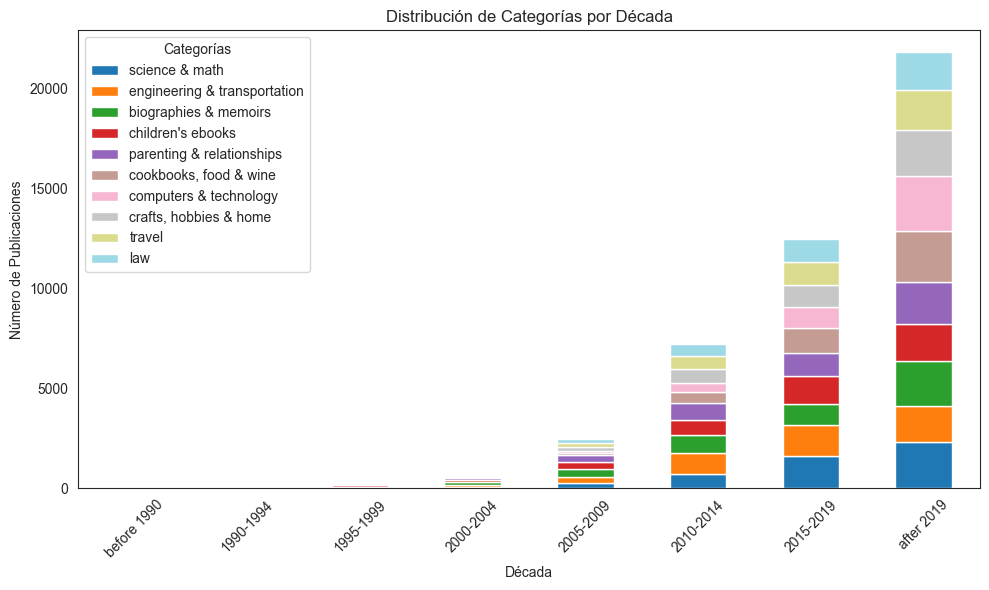

In [29]:
generos_decada_piv.iloc[:,1:].plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")
plt.title('Distribución de Categorías por Década')
plt.ylabel('Número de Publicaciones')
plt.xlabel('Década')
plt.xticks(rotation=45)
plt.legend(title='Categorías')
plt.tight_layout()
plt.show()

In [30]:
total = generos_decada_piv.sum().sum()
print("Total de libros: ", total)

Total de libros:  83102


Ahora vamos a pasarlo a %. para ver la distribución de los géneros por década.

In [31]:
totales_decada = generos_decada_piv.sum(axis=1)

In [32]:
generos_decada_per = generos_decada_piv.div(totales_decada, axis =0) * 100

In [33]:
generos_decada_per

category_top_10,others,science & math,engineering & transportation,biographies & memoirs,children's ebooks,parenting & relationships,"cookbooks, food & wine",computers & technology,"crafts, hobbies & home",travel,law
year_range,,,,,,,,,,,
before 1990,36.200717,3.942652,2.508961,5.376344,34.050179,3.584229,3.225806,0.716846,1.792115,4.301075,4.301075
1990-1994,48.924731,4.838710,3.225806,3.225806,16.129032,3.225806,2.688172,2.150538,5.913978,4.301075,5.376344
1995-1999,43.935927,3.203661,8.237986,6.178490,18.077803,4.805492,2.745995,2.059497,2.974828,4.118993,3.661327
2000-2004,47.848665,4.302671,7.047478,9.718101,10.756677,6.899110,1.409496,1.557864,2.818991,3.783383,3.857567
2005-2009,47.808681,5.520438,5.899705,8.870628,6.805731,7.985672,2.064897,2.001686,3.750527,4.761905,4.530131
2010-2014,46.312509,5.119454,8.102092,6.670129,5.460751,6.187862,4.140080,3.190384,5.245585,5.126873,4.444280
2015-2019,44.591474,7.113677,6.842806,4.746892,6.283304,5.031083,5.537300,4.733570,4.786856,5.071048,5.261989
after 2019,45.604368,5.707091,4.555201,5.564975,4.654932,5.225890,6.325421,6.976164,5.709584,5.011469,4.664905


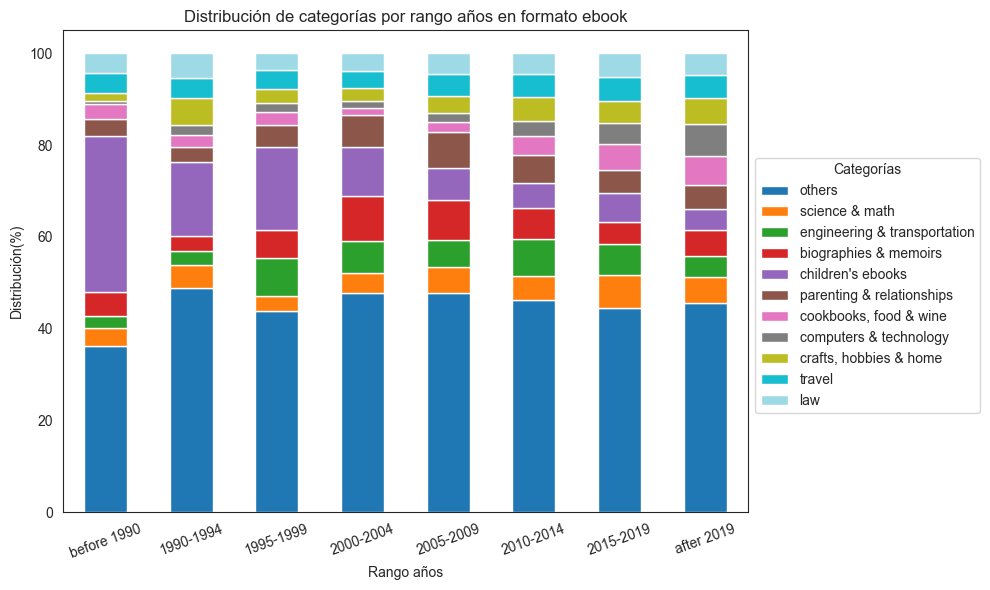

In [37]:
generos_decada_per.plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")
plt.title('Distribución de categorías por rango años en formato ebook')
plt.ylabel('Distribución(%)')
plt.xlabel('Rango años')
plt.xticks(rotation=20)
plt.legend(title='Categorías',bbox_to_anchor=[1, 0.75], loc='upper left')
plt.tight_layout()
plt.show()


In [38]:
generos_decada_piv.sum(axis=1)

year_range
before 1990      279
1990-1994        186
1995-1999        437
2000-2004       1348
2005-2009       4746
2010-2014      13478
2015-2019      22520
after 2019     40108
dtype: int64

Ahora vamos a comprobar el número total de reviews por género

In [39]:
reviews_top10 = df_kd_h1.groupby("category_top_10")["reviews"].sum().reset_index(name='total_reviews')

In [40]:
top10cat_reviews = reviews_top10.sort_values(by="total_reviews", ascending=False)

# Wonderbook carga y limpieza ds

In [41]:
# booksdataset vamos a ver si sacamos años de publicacion y categoría
bookdataset = "../data/BBDD_EDA/BooksDatasetClean.csv"
df = pd.read_csv(bookdataset)

def clean_bookdataset(df):
    for column in df.columns:
        #print("Va por: ", column)
        if df[column].dtype == object:
            #print("tipo columna: ", df[column].dtype)
            df[column] = df[column].astype(str).str.strip()
            #df[column] = df[column].str.strip()
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    for column in df.columns:
        if df[column].dtype == object:
            #print("tipo columna: ", df[column].dtype)
            df[column] = df[column].str.lower()
            df[column] = df[column].str.replace("by ", "")
            df[column] = df[column].str.replace("by", "")
            df[column] = df[column].str.replace("by", "")
            df.replace({'nan': np.nan}, inplace=True)
    # para eliminar lineas sin título        
    df.drop(df[df["title"] == ""].index, inplace=True)
    df["authors"] = np.where(df["authors"] == "", "unknown", df["authors"])    
    return df

df_bd = clean_bookdataset(df)

In [42]:
df_bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103063 entries, 0 to 103062
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   title                    103063 non-null  object 
 1   authors                  103063 non-null  object 
 2   description              70204 non-null   object 
 3   category                 76902 non-null   object 
 4   publisher                103055 non-null  object 
 5   price_starting_with_($)  103063 non-null  float64
 6   publish_date_(month)     103063 non-null  object 
 7   publish_date_(year)      103063 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 6.3+ MB


In [43]:
# Para eliminar duplicados sin autor
df_duplicated = df_bd[df_bd["title"].duplicated()].sort_values(by= "authors", ascending= True)

In [44]:
df_duplicated.shape

(5954, 8)

In [45]:
df_bd.drop(df_duplicated[df_duplicated["authors"] == "Unknown"].index, inplace= True)

In [46]:
# para eliminar duplicados quedándonos con el primer año de publicación del mismo título
df_bd.sort_values(by="publish_date_(year)", inplace=True)
df_bd.drop_duplicates("title", inplace=True)

In [47]:
df_bd[df_bd["authors"] == "unknown"].head(1)

,title,authors,description,category,publisher,price_starting_with_($),publish_date_(month),publish_date_(year)
88283,better homes and gardens annual recipes 2009 (...,unknown,NaN,NaN,better homes and gardens,6.89,january,1828


In [48]:
df_bd.head(1)

,title,authors,description,category,publisher,price_starting_with_($),publish_date_(month),publish_date_(year)
45462,ferrets dr. wendy winsted (1992-10-02),"winsted, wendy",NaN,NaN,tfh publications,11.56,january,1755


In [49]:
# Dividir la columna 'category' por comas en un número dinámico de columnas
category_cols = df_bd['category'].str.split(',', expand=True)

# Eliminar espacios en blanco de las columnas resultantes
category_cols = category_cols.apply(lambda x: x.str.strip())

# Renombrar las columnas de categorías de forma dinámica
category_cols.columns = [f'category_{i+1}' for i in range(category_cols.shape[1])]

# Unir las nuevas columnas al DataFrame original
df_bd = pd.concat([df_bd, category_cols], axis=1)


In [50]:
df_bd["category_1"].value_counts()

category_1
fiction                            16857
juvenile fiction                    6406
religion                            4905
cooking                             3803
juvenile nonfiction                 3027
business & economics                2876
history                             2282
biography & autobiography           2050
political science                   1886
health & fitness                    1735
social science                      1665
travel                              1629
young adult fiction                 1464
family & relationships              1428
sports & recreation                 1217
self-help                           1209
humor                               1027
crafts & hobbies                     991
reference                            988
science                              983
house & home                         975
computers                            957
psychology                           928
medical                              771
garde

In [51]:
df_bd[df_bd["category_1"] == "fiction"]["category_2"].value_counts()

category_2
romance                           3122
general                           2342
mystery & detective               2268
thrillers                         1968
literary                          1464
science fiction                    837
historical                         684
fantasy                            614
classics                           348
christian                          322
religious                          285
short stories (single author)      252
women                              250
action & adventure                 228
humorous                           218
family life                        196
sagas                              152
psychological                      148
war & military                     141
anthologies (multiple authors)     134
westerns                           112
horror                             101
contemporary women                  91
political                           61
legal                               55
media tie-in  

In [52]:
df_bd["category_resumen_1"] = np.where(df_bd['category_1'] == 'fiction', df_bd['category_2'], df_bd['category_1'])

In [53]:
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'general', "literary & fiction", df_bd["category_resumen_1"])
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'literary', "literary & fiction", df_bd["category_resumen_1"])
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'thrillers', "mystery, thriller & suspense", df_bd["category_resumen_1"])
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'mystery & detective', "mystery, thriller & suspense", df_bd["category_resumen_1"])
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'christian', "religion & spirituality", df_bd["category_resumen_1"])
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'religious', "religion & spirituality", df_bd["category_resumen_1"])
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'religion', "religion & spirituality", df_bd["category_resumen_1"])
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'political science', "politics & social sciences", df_bd["category_resumen_1"])
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'social science', "politics & social sciences", df_bd["category_resumen_1"])
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'historical', "history", df_bd["category_resumen_1"])
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'crafts & hobbies', "crafts, hobbies & home", df_bd["category_resumen_1"])
df_bd["category_resumen_1"] = np.where(df_bd['category_resumen_1'] == 'house & home', "crafts, hobbies & home", df_bd["category_resumen_1"])

In [54]:
df_bd["category_resumen_1"].value_counts().head(10)

category_resumen_1
juvenile fiction                6406
religion & spirituality         5512
mystery, thriller & suspense    4236
literary & fiction              3806
cooking                         3803
politics & social sciences      3551
romance                         3122
juvenile nonfiction             3027
history                         2966
business & economics            2876
Name: count, dtype: int64

In [55]:
# Para generar variable top_10 de categorías
top_10_categories = df_bd["category_resumen_1"].value_counts().nlargest(10).index
df_bd['category_top_10'] =  np.nan
df_bd['category_top_10'] = np.where(df_bd['category_resumen_1'].isna(), np.nan, np.where(df_bd['category_resumen_1'].isin(top_10_categories), df_bd['category_resumen_1'], 'others'))

In [56]:
# Nueva columna de rangos de décadas
bins = [-float('inf'), 1989, 1994, 1999, 2004, 2009, 2014, 2019, float('inf')]
labels = ['before 1990', '1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2015-2019', 'after 2019']

df_bd['year_range'] = pd.cut(df_bd['publish_date_(year)'], bins=bins, labels=labels)

In [57]:
df_bd.head(1)

,title,authors,description,category,publisher,price_starting_with_($),publish_date_(month),publish_date_(year),category_1,category_2,...,category_9,category_10,category_11,category_12,category_13,category_14,category_15,category_resumen_1,category_top_10,year_range
45462,ferrets dr. wendy winsted (1992-10-02),"winsted, wendy",NaN,NaN,tfh publications,11.56,january,1755,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,before 1990


In [58]:
# para eliminar las columnas de categorías a partir de la categoría 2. Esas no las vamos a tener en cuenta
df_bd.drop(df_bd.loc[:,"category_3":"category_15"], axis=1, inplace= True)

In [59]:
# para eliminar las otras columnas innecesarias para el análisis posterior
df_bd.drop(df_bd.loc[:,["description","category","publish_date_(month)", "category_1", "category_2" ]], axis=1, inplace= True)

In [60]:
df_bd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97109 entries, 45462 to 72814
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   title                    97109 non-null  object  
 1   authors                  97109 non-null  object  
 2   publisher                97101 non-null  object  
 3   price_starting_with_($)  97109 non-null  float64 
 4   publish_date_(year)      97109 non-null  int64   
 5   category_resumen_1       72046 non-null  object  
 6   category_top_10          72046 non-null  object  
 7   year_range               97109 non-null  category
dtypes: category(1), float64(1), int64(1), object(5)
memory usage: 6.0+ MB


# Analisis con datos Wonderbook (libros papel.1)

### Hipótesis 1
Desde este dataset, vamos a sacar un histograma con la evolución de los títulos publicados por década (year_range)

In [61]:
# para una primera hipótesis, vamos a cargar el dataset filtrado anterior en una nueva variable
df_bd_h1 = df_bd.copy()

In [62]:
df_bd_h1.head(3)

,title,authors,publisher,price_starting_with_($),publish_date_(year),category_resumen_1,category_top_10,year_range
45462,ferrets dr. wendy winsted (1992-10-02),"winsted, wendy",tfh publications,11.56,1755,NaN,NaN,before 1990
100864,the rainy day book: pick-me-ups for when you'r...,mark gilroy communications,"j. countryman/thomas nelson, inc.",5.29,1787,NaN,NaN,before 1990
65356,how to be the funniest kid in the whole wide w...,jay leno,simon & schuster,5.29,1793,NaN,NaN,before 1990


In [63]:
# Primero ordenamos los datos por año de publi, por si estuvieran desordenados
df_bd_h1.sort_values("publish_date_(year)", ascending= True, inplace=True)

In [64]:
df_bd_h1.head(1)

,title,authors,publisher,price_starting_with_($),publish_date_(year),category_resumen_1,category_top_10,year_range
45462,ferrets dr. wendy winsted (1992-10-02),"winsted, wendy",tfh publications,11.56,1755,NaN,NaN,before 1990


In [65]:
# Para graficar los datos referidos a publicaciones totales por década.
titles_decade_count = df_bd_h1.groupby("year_range")["title"].count().reset_index(name='title_count')

C:\Users\anusk\AppData\Local\Temp\ipykernel_24260\4005696078.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titles_decade_count = df_bd_h1.groupby("year_range")["title"].count().reset_index(name='title_count')


In [66]:
titles_decade_count

,year_range,title_count
0,before 1990,25089
1,1990-1994,14175
2,1995-1999,19405
3,2000-2004,20300
4,2005-2009,15430
5,2010-2014,2491
6,2015-2019,164
7,after 2019,55


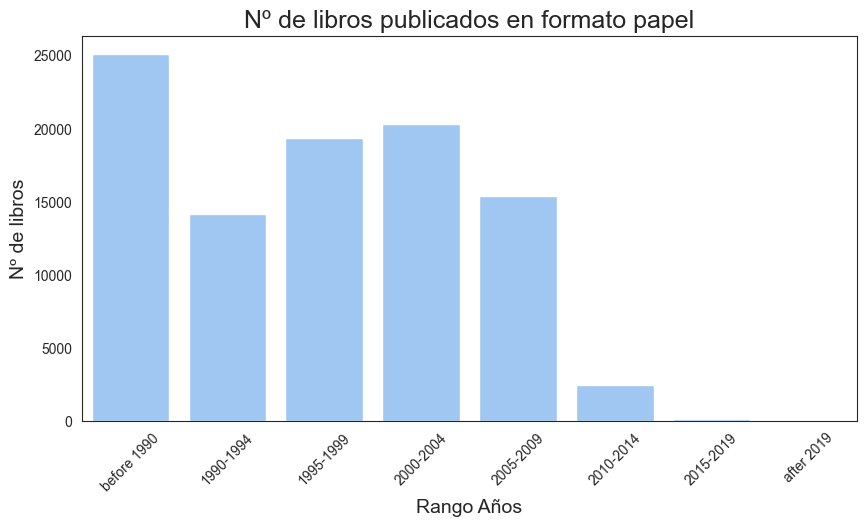

In [69]:
plt.figure(figsize=(10,5))
sns.barplot(titles_decade_count, x = "year_range", y = "title_count")
plt.xticks(rotation= 45)
plt.title('Nº de libros publicados en formato papel', fontsize=18)
plt.xlabel('Rango Años', fontsize=14)
plt.ylabel('Nº de libros', fontsize=14);


Otros análisis desde este dataset:


Primero vamos a obtener el número de libros publicado por género por cada década

In [70]:
generos_decada = df_bd_h1.groupby(["year_range","category_top_10"])["title"].size().reset_index(name='counts')

C:\Users\anusk\AppData\Local\Temp\ipykernel_24260\1900853679.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  generos_decada = df_bd_h1.groupby(["year_range","category_top_10"])["title"].size().reset_index(name='counts')


In [71]:
generos_decada_piv = generos_decada.pivot(index='year_range', columns='category_top_10', values='counts')

In [72]:
generos_decada_piv

category_top_10,business & economics,cooking,history,juvenile fiction,juvenile nonfiction,literary & fiction,"mystery, thriller & suspense",others,politics & social sciences,religion & spirituality,romance
year_range,,,,,,,,,,,
before 1990,299,706,703,906,476,786,452,4979,623,859,67
1990-1994,514,779,505,751,537,784,419,4863,566,658,181
1995-1999,838,1017,578,1371,790,839,774,7769,639,1248,428
2000-2004,737,803,652,1741,832,813,1034,8060,784,1483,908
2005-2009,439,435,458,1414,347,486,1231,6025,813,1057,1221
2010-2014,42,60,65,169,35,88,318,974,123,191,308
2015-2019,5,2,5,32,8,5,3,63,3,13,6
after 2019,2,1,0,22,2,5,5,8,0,3,3


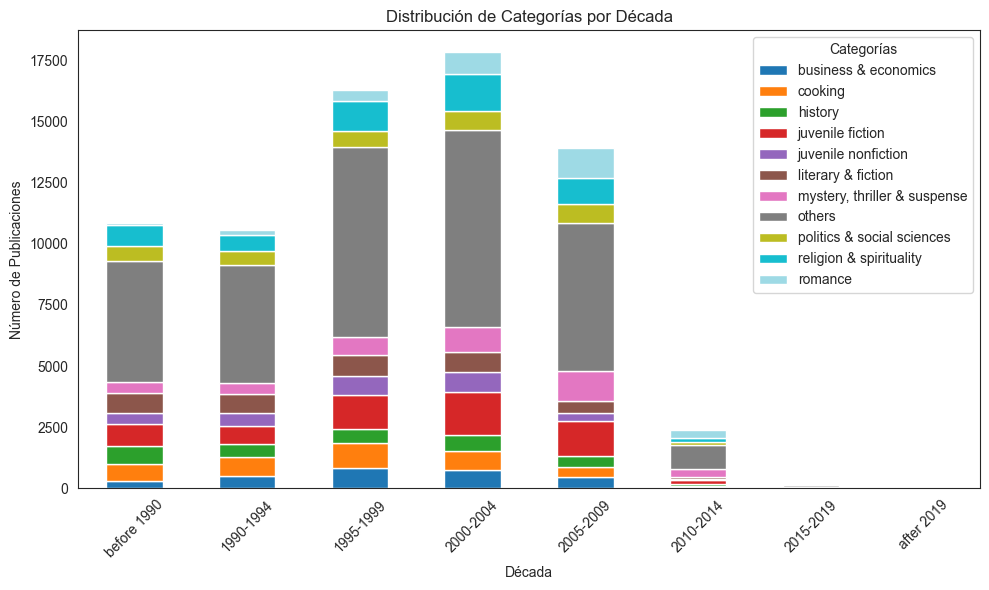

In [73]:
generos_decada_piv.plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")
plt.title('Distribución de Categorías por Década')
plt.ylabel('Número de Publicaciones')
plt.xlabel('Década')
plt.xticks(rotation=45)
plt.legend(title='Categorías')
plt.tight_layout()
plt.show()

In [74]:
others_genre = generos_decada_piv["others"]
others_genre = others_genre.reset_index(name="others").set_index("year_range").T

In [75]:
others_genre

year_range,before 1990,1990-1994,1995-1999,2000-2004,2005-2009,2010-2014,2015-2019,after 2019
others,4979,4863,7769,8060,6025,974,63,8


In [76]:
category_totals = generos_decada_piv.sum().sort_values(ascending=False)
generos_decada_piv  = generos_decada_piv [category_totals.index]

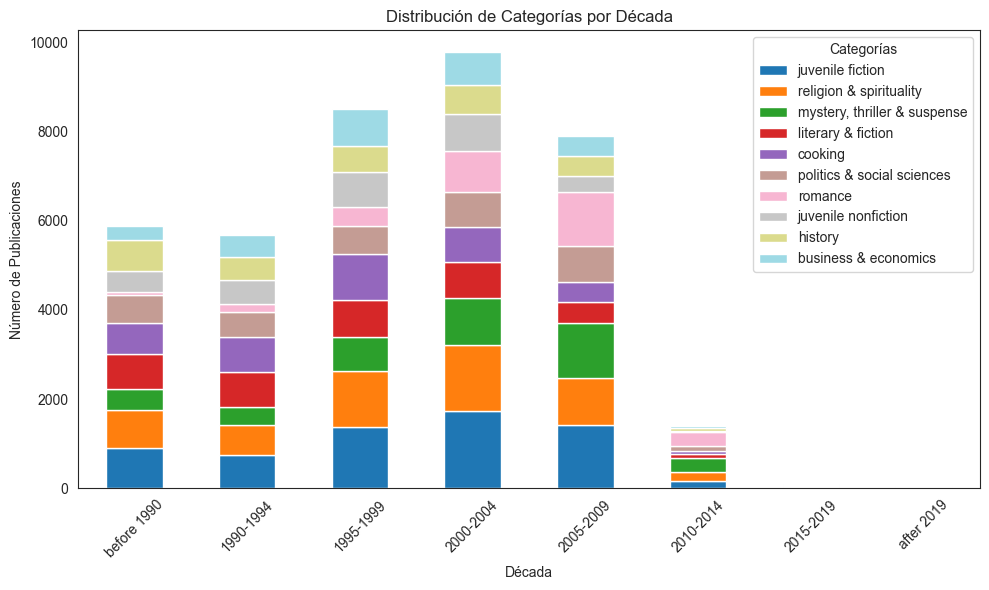

In [77]:
generos_decada_piv.iloc[:,1:].plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")
plt.title('Distribución de Categorías por Década')
plt.ylabel('Número de Publicaciones')
plt.xlabel('Década')
plt.xticks(rotation=45)
plt.legend(title='Categorías')
plt.tight_layout()
plt.show()

In [78]:
total = generos_decada_piv.sum().sum()
print("Total de libros: ", total)

Total de libros:  72046


Ahora vamos a pasarlo a %. para ver la distribución de los géneros por década.

In [79]:
totales_decada = generos_decada_piv.sum(axis=1)

In [80]:
generos_decada_per = generos_decada_piv.div(totales_decada, axis =0) * 100

In [81]:
generos_decada_per

category_top_10,others,juvenile fiction,religion & spirituality,"mystery, thriller & suspense",literary & fiction,cooking,politics & social sciences,romance,juvenile nonfiction,history,business & economics
year_range,,,,,,,,,,,
before 1990,45.864038,8.345615,7.912675,4.163596,7.240236,6.503316,5.738762,0.617170,4.384672,6.475682,2.754237
1990-1994,46.064223,7.113763,6.232831,3.968931,7.426352,7.378990,5.361372,1.714502,5.086672,4.783556,4.868807
1995-1999,47.688908,8.415690,7.660672,4.751090,5.150083,6.242711,3.922411,2.627217,4.849303,3.547971,5.143945
2000-2004,45.161652,9.755141,8.309520,5.793691,4.555387,4.499356,4.392895,5.087690,4.661848,3.653275,4.129546
2005-2009,43.264398,10.153669,7.590119,8.839581,3.489875,3.123654,5.838001,8.767773,2.491742,3.288812,3.152377
2010-2014,41.045091,7.121787,8.048883,13.400759,3.708386,2.528445,5.183312,12.979351,1.474926,2.739149,1.769912
2015-2019,43.448276,22.068966,8.965517,2.068966,3.448276,1.379310,2.068966,4.137931,5.517241,3.448276,3.448276
after 2019,15.686275,43.137255,5.882353,9.803922,9.803922,1.960784,0.000000,5.882353,3.921569,0.000000,3.921569


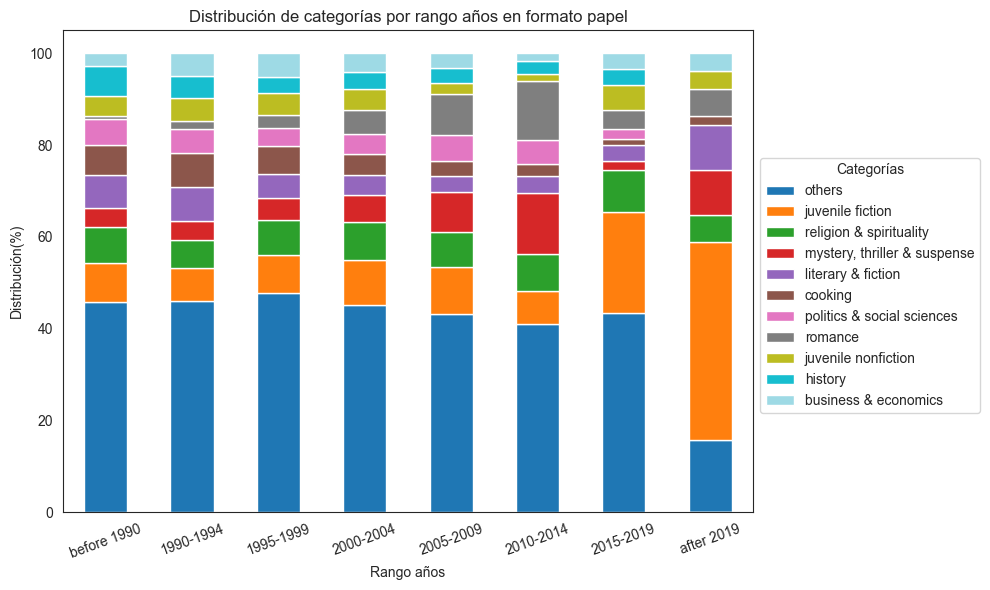

In [85]:
generos_decada_per.plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")
plt.title('Distribución de categorías por rango años en formato papel')
plt.ylabel('Distribución(%)')
plt.xlabel('Rango años')
plt.xticks(rotation=20)
plt.legend(title='Categorías',bbox_to_anchor=[1, 0.75], loc='upper left')
plt.tight_layout()
plt.show()


In [83]:
generos_decada_piv.sum(axis=1)

year_range
before 1990    10856
1990-1994      10557
1995-1999      16291
2000-2004      17847
2005-2009      13926
2010-2014       2373
2015-2019        145
after 2019        51
dtype: int64

# Audible carga y limpieza de dataset

In [86]:
audible= pd.read_csv("../data/BBDD_EDA/Audible_Top_100_Final.csv", encoding='windows-1252')


def clean_dataset(df):
    # para eliminar filas sin titulo si las hubiera. OJO, la columna de los títulos puede tener diferente nombre según el dataset
    df.drop(df[df["Title"].isnull()].index, inplace=True)
    # para eliminar columna unnamed si la hubiera
    #df.drop(columns=['Unnamed: 0'], inplace=True)
    # eliminación de columnas en las que todos los valores son nulos
    df = df.dropna(how="all", axis= 1)
    # para convertir las columnas de tipo object en string y limpiar posibles espacios por delante y por detrás
    for column in df.columns:
        #print("Va por: ", column)
        if df[column].dtype == object:
            print("tipo columna: ", df[column].dtype)
            df[column] = df[column].astype(str).str.strip()
            #df[column] = df[column].str.strip()
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    for column in df.columns:
        if df[column].dtype == object:
            #print("tipo columna: ", df[column].dtype)
            df[column] = df[column].str.lower()
    df = df.iloc[:,:-9].copy()
    df = df.iloc[:,0:13].copy()
    # categories = df["categories"].unique()
    # df_ranking = df.copy()
    # for categorie in categories:
    #     #print(categorie)
    #     df_categorie = df[df["categories"] == categorie].copy()
    #     df_categorie = df_categorie.sort_values(by= ["ratings"], ascending= False)
    #     df_categorie["ranking_" + str(categorie)] = range(1, len(df_categorie) + 1)
    #     df_ranking = pd.merge(df_ranking,df_categorie[["title", "ranking_" +  categorie]], on = "title", how="left")
    return df

df_audible = clean_dataset(audible)

tipo columna:  object
tipo columna:  object
tipo columna:  object
tipo columna:  object
tipo columna:  object
tipo columna:  object
tipo columna:  object
tipo columna:  object
tipo columna:  object
tipo columna:  object
tipo columna:  object
tipo columna:  object
tipo columna:  object
tipo columna:  object
tipo columna:  object
tipo columna:  object


C:\Users\anusk\AppData\Local\Temp\ipykernel_24260\2869085433.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(str).str.strip()
C:\Users\anusk\AppData\Local\Temp\ipykernel_24260\2869085433.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(str).str.strip()
C:\Users\anusk\AppData\Local\Temp\ipykernel_24260\2869085433.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [87]:
# para crear columna de año a partir de la de fecha de publicacion
df_audible["published_year"] = df_audible["releasedate"].str.split("/").str[2]
df_audible["published_year"] = df_audible["published_year"].astype("Int64")
# Nueva columna de rangos de décadas. En kindle va desde los 2000
bins = [-float('inf'), 1989, 1994, 1999, 2004, 2009, 2014, 2019, float('inf')]
labels = ['before 1990', '1990-1994', '1995-1999', '2000-2004', '2005-2009', '2010-2014', '2015-2019', 'after 2019']

df_audible['year_range'] = pd.cut(df_audible['published_year'], bins=bins, labels=labels)


In [88]:
df_audible.head(1)

,title,categories,author,narrated_by,series,length_(hours),length_(minutes),releasedate,price,ratings,overall_rating_out_of_5,performance_rating_out_of_5,story_rating_out_of_5,published_year,year_range
0,learn arabic ultimate bundle,travel & tourism,global citizen language learning,mehdi ben mahmoud,nan,13,28.0,12/4/2023,24.95,34,5.0,5.0,5.0,2023,after 2019


In [89]:
# Para generar variable top_10 de categorías
top_10_categories = df_audible["categories"].value_counts().nlargest(10).index
df_audible['category_top_10'] =  np.nan
df_audible['category_top_10'] = np.where(df_audible['categories'].isna(), np.nan, np.where(df_audible['categories'].isin(top_10_categories), df_audible['categories'], 'others'))

In [90]:
df_audible.head(2)

,title,categories,author,narrated_by,series,length_(hours),length_(minutes),releasedate,price,ratings,overall_rating_out_of_5,performance_rating_out_of_5,story_rating_out_of_5,published_year,year_range,category_top_10
0,learn arabic ultimate bundle,travel & tourism,global citizen language learning,mehdi ben mahmoud,nan,13,28.0,12/4/2023,24.95,34,5.0,5.0,5.0,2023,after 2019,travel & tourism
1,the impossible first,travel & tourism,colin o'brady,colin o'brady,nan,8,38.0,1/14/2020,18.74,1156,4.7,4.7,4.8,2020,after 2019,travel & tourism


# Analisis datos Audible

### Hipótesis 1
Desde este dataset, vamos a sacar un histograma con la evolución de los títulos publicados por década (year_range)

C:\Users\anusk\AppData\Local\Temp\ipykernel_24260\2684406505.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titles_ryear_count_aud = df_audible.groupby("year_range")["title"].count().reset_index(name='title_count')


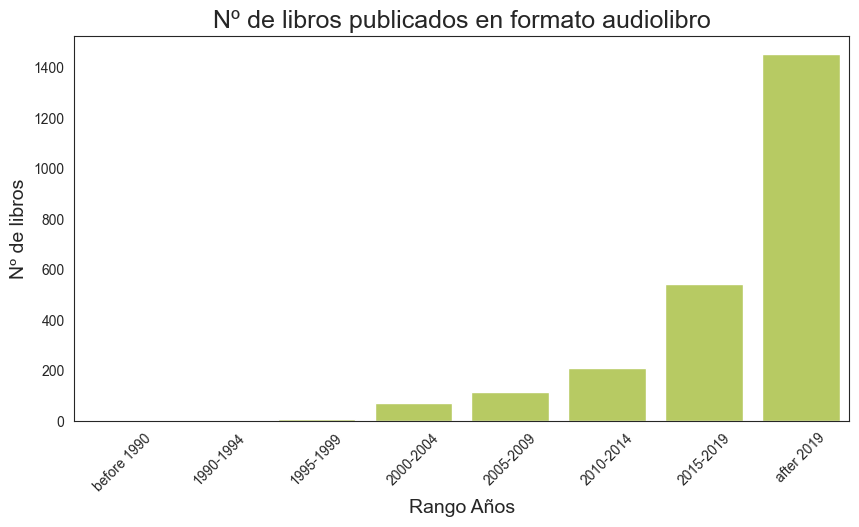

In [93]:
# Para graficar los datos referidos a publicaciones totales por rango años
plt.figure(figsize=(10,5))
titles_ryear_count_aud = df_audible.groupby("year_range")["title"].count().reset_index(name='title_count')
sns.barplot(titles_ryear_count_aud, x = "year_range", y = "title_count", color = "#C2DB52")
plt.xticks(rotation= 45)
plt.title('Nº de libros publicados en formato audiolibro', fontsize=18)
plt.xlabel('Rango Años', fontsize=14)
plt.ylabel('Nº de libros', fontsize=14);

Otros análisis desde este dataset:


Primero vamos a obtener el número de libros publicado por género por cada década

In [94]:
generos_decada = df_audible.groupby(["year_range","category_top_10"])["title"].size().reset_index(name='counts')

C:\Users\anusk\AppData\Local\Temp\ipykernel_24260\3293868055.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  generos_decada = df_audible.groupby(["year_range","category_top_10"])["title"].size().reset_index(name='counts')


In [95]:
generos_decada_piv = generos_decada.pivot(index='year_range', columns='category_top_10', values='counts')

In [96]:
generos_decada_piv

category_top_10,"mystery, thriller & suspense",others,politics & social sciences,"relationships, parenting & personal development",religion & spirituality,romance,science & engineering,science fiction & fantasy,sports & outdoors,teen & young adult,travel & tourism
year_range,,,,,,,,,,,
before 1990,0,0,0,0,0,0,0,0,0,0,0
1990-1994,0,0,0,0,0,0,0,0,0,0,0
1995-1999,0,4,1,0,0,0,1,0,1,0,3
2000-2004,0,44,3,4,7,0,1,3,2,3,4
2005-2009,0,53,7,3,9,5,3,12,6,6,10
2010-2014,5,127,6,6,6,5,8,9,11,13,15
2015-2019,18,340,18,21,26,10,36,16,16,31,10
after 2019,77,832,65,66,52,80,51,60,64,47,58


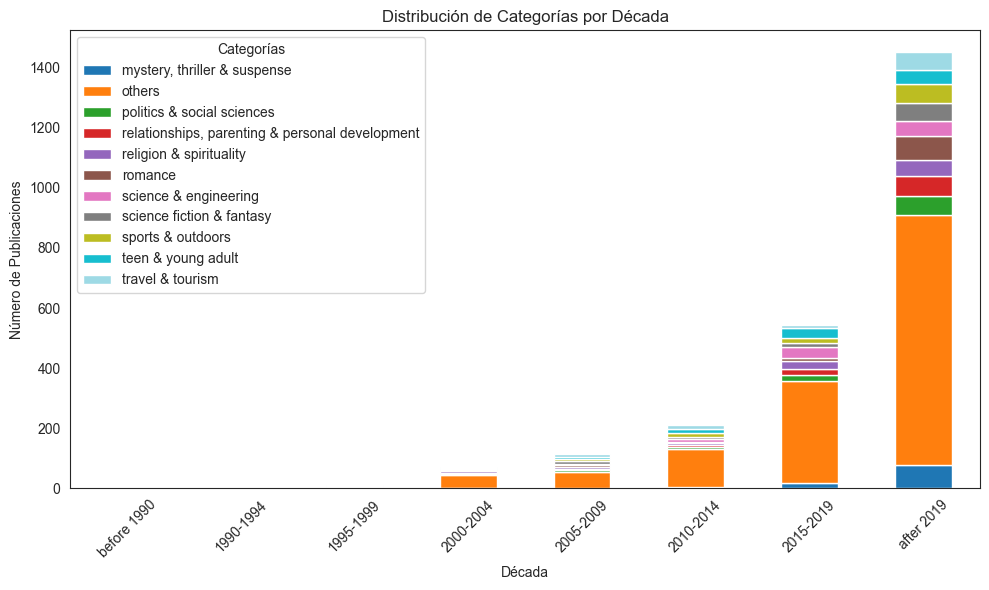

In [97]:
generos_decada_piv.plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")
plt.title('Distribución de Categorías por Década')
plt.ylabel('Número de Publicaciones')
plt.xlabel('Década')
plt.xticks(rotation=45)
plt.legend(title='Categorías')
plt.tight_layout()
plt.show()

In [98]:
others_genre = generos_decada_piv["others"]
others_genre = others_genre.reset_index(name="others").set_index("year_range").T

In [99]:
others_genre

year_range,before 1990,1990-1994,1995-1999,2000-2004,2005-2009,2010-2014,2015-2019,after 2019
others,0,0,4,44,53,127,340,832


In [100]:
category_totals = generos_decada_piv.sum().sort_values(ascending=False)
generos_decada_piv  = generos_decada_piv [category_totals.index]

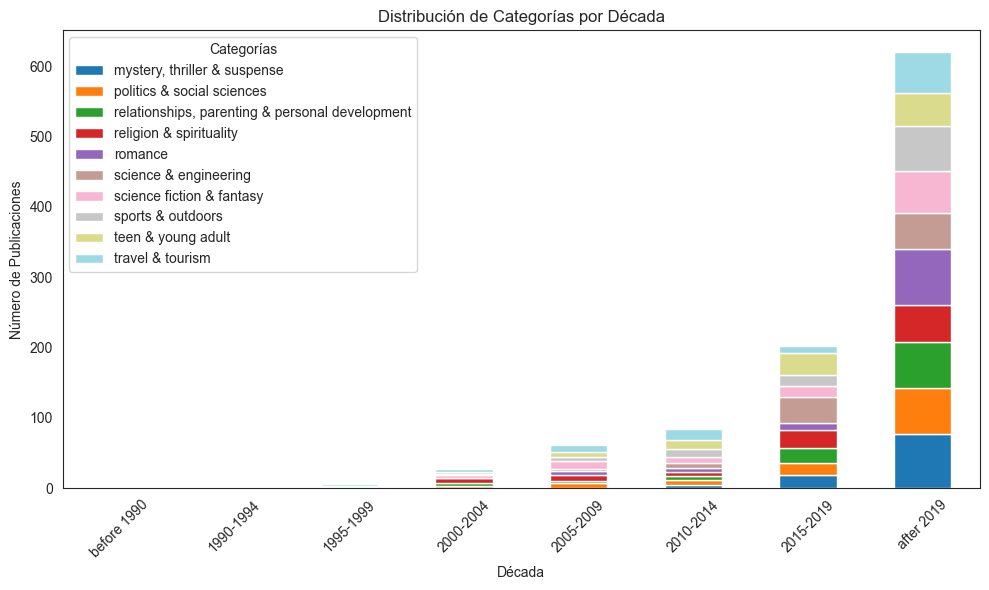

In [101]:
generos_decada_piv.iloc[:,1:].plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")
plt.title('Distribución de Categorías por Década')
plt.ylabel('Número de Publicaciones')
plt.xlabel('Década')
plt.xticks(rotation=45)
plt.legend(title='Categorías')
plt.tight_layout()
plt.show()

In [102]:
total = generos_decada_piv.sum().sum()
print("Total de libros: ", total)

Total de libros:  2400


Ahora vamos a pasarlo a %. para ver la distribución de los géneros por década.

In [103]:
totales_decada = generos_decada_piv.sum(axis=1)

In [104]:
generos_decada_per = generos_decada_piv.div(totales_decada, axis =0) * 100

In [105]:
generos_decada_per

category_top_10,others,"mystery, thriller & suspense",politics & social sciences,"relationships, parenting & personal development",religion & spirituality,romance,science & engineering,science fiction & fantasy,sports & outdoors,teen & young adult,travel & tourism
year_range,,,,,,,,,,,
before 1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-1999,40.000000,0.000000,10.000000,0.000000,0.000000,0.000000,10.000000,0.000000,10.000000,0.000000,30.000000
2000-2004,61.971831,0.000000,4.225352,5.633803,9.859155,0.000000,1.408451,4.225352,2.816901,4.225352,5.633803
2005-2009,46.491228,0.000000,6.140351,2.631579,7.894737,4.385965,2.631579,10.526316,5.263158,5.263158,8.771930
2010-2014,60.189573,2.369668,2.843602,2.843602,2.843602,2.369668,3.791469,4.265403,5.213270,6.161137,7.109005
2015-2019,62.730627,3.321033,3.321033,3.874539,4.797048,1.845018,6.642066,2.952030,2.952030,5.719557,1.845018
after 2019,57.300275,5.303030,4.476584,4.545455,3.581267,5.509642,3.512397,4.132231,4.407713,3.236915,3.994490


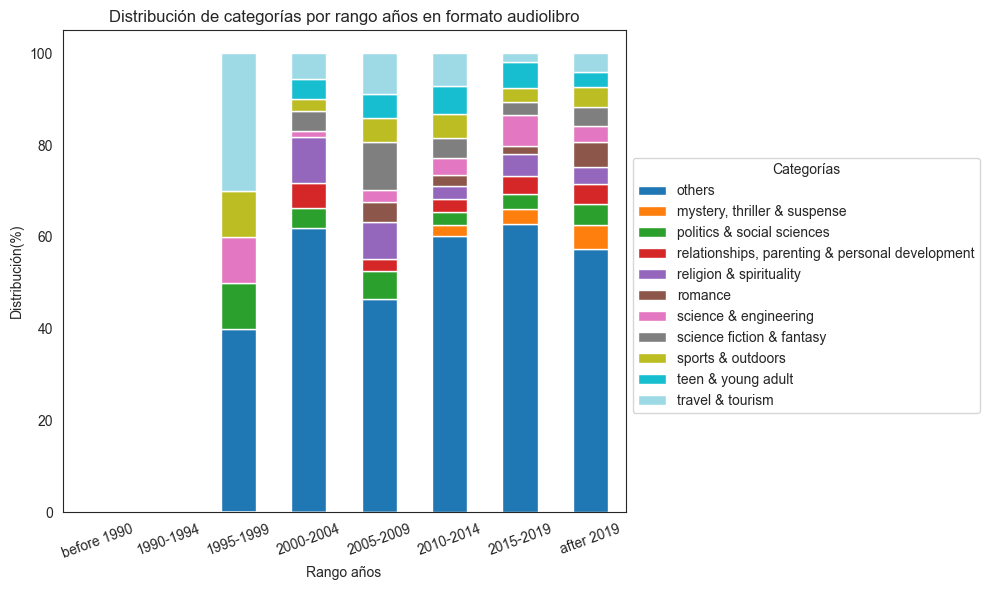

In [109]:
generos_decada_per.plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")
plt.title('Distribución de categorías por rango años en formato audiolibro')
plt.ylabel('Distribución(%)')
plt.xlabel('Rango años')
plt.xticks(rotation=20)
plt.legend(title='Categorías',bbox_to_anchor=[1, 0.75], loc='upper left')
plt.tight_layout()
plt.show()


In [107]:
generos_decada_piv.sum(axis=1)

year_range
before 1990       0
1990-1994         0
1995-1999        10
2000-2004        71
2005-2009       114
2010-2014       211
2015-2019       542
after 2019     1452
dtype: int64

In [108]:
df_audible.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   title                        2400 non-null   object  
 1   categories                   2400 non-null   object  
 2   author                       2400 non-null   object  
 3   narrated_by                  2400 non-null   object  
 4   series                       2400 non-null   object  
 5   length_(hours)               2400 non-null   int64   
 6   length_(minutes)             2351 non-null   float64 
 7   releasedate                  2400 non-null   object  
 8   price                        2338 non-null   float64 
 9   ratings                      2400 non-null   object  
 10  overall_rating_out_of_5      2327 non-null   float64 
 11  performance_rating_out_of_5  2327 non-null   float64 
 12  story_rating_out_of_5        2327 non-null   float64 
 13  pub

## Carga del dataset de amazon con el top 100 de ventas
Desde 2009 a 2021

In [110]:
amazon = pd.read_excel("../data/BBDD_EDA/Amazon_top100.xlsx")

def clean_top100amazon(df):
    df.drop(columns=['Unnamed: 0'], inplace=True)
    df = df.dropna(how="all", axis= 1)
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    for column in df.columns:
        if df[column].dtype == object:
            print("tipo columna: ", df[column].dtype)
            df[column] = df[column].str.lower()
            df[column] = df[column].astype(str).str.strip()
            df.replace({'nan': np.nan}, inplace=True)
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    # para eliminar lineas sin título        
    df.drop(df[df["title"] == ""].index, inplace=True)
    df.drop(df[df["title"].isnull()].index, inplace=True)
    return df

df_am= clean_top100amazon(amazon)

tipo columna:  object
tipo columna:  object
tipo columna:  object
tipo columna:  object


In [111]:
df_am.head(2)

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre
0,12.49,1.0,the lost symbol,16118.0,4.4,dan brown,hardcover,2009,fiction
1,13.40,2.0,the shack: where tragedy confronts eternity,23392.0,4.7,william p. young,paperback,2009,fiction


In [112]:
df_am.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1283 entries, 0 to 1290
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1283 non-null   float64
 1   ranks          1283 non-null   float64
 2   title          1283 non-null   object 
 3   no_of_reviews  1283 non-null   float64
 4   ratings        1283 non-null   float64
 5   author         1283 non-null   object 
 6   cover_type     1283 non-null   object 
 7   year           1283 non-null   int64  
 8   genre          1282 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 100.2+ KB


In [113]:
# titulos iguales entre kindle y amazon
tit_kindle = df_kd_h1["title"].unique()
tit_amazon = df_am["title"].unique()
titulos_iguales_kam = [x for x in tit_amazon if x in tit_kindle]

In [114]:
len(titulos_iguales_kam)

277

In [115]:
df_am = df_am.merge(df_kd_h1[['title', 'category_top_10']], on='title', how='left')

In [116]:
df_am.head(2)

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre,category_top_10
0,12.49,1.0,the lost symbol,16118.0,4.4,dan brown,hardcover,2009,fiction,NaN
1,13.40,2.0,the shack: where tragedy confronts eternity,23392.0,4.7,william p. young,paperback,2009,fiction,NaN


In [117]:
df_am = df_am.merge(df_bd_h1[['title', 'category_top_10']], on='title', how='left', suffixes=("", "_bd"))

In [118]:
df_am.head(2)

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre,category_top_10,category_top_10_bd
0,12.49,1.0,the lost symbol,16118.0,4.4,dan brown,hardcover,2009,fiction,NaN,"mystery, thriller & suspense"
1,13.40,2.0,the shack: where tragedy confronts eternity,23392.0,4.7,william p. young,paperback,2009,fiction,NaN,religion & spirituality


In [119]:
df_am['category_combined'] = df_am['category_top_10'].combine_first(df_am['category_top_10_bd'])

In [120]:
df_am['category_combined'].unique()

array(['mystery, thriller & suspense', 'religion & spirituality',
       'politics & social sciences', 'others', nan, 'juvenile fiction',
       'literary & fiction', 'cooking', "children's ebooks",
       'science & math', 'biographies & memoirs', 'history',
       'cookbooks, food & wine', 'juvenile nonfiction',
       'business & economics', 'romance', 'parenting & relationships',
       'travel', 'law', 'engineering & transportation',
       'crafts, hobbies & home'], dtype=object)

In [121]:
df_am["category_combined"] = np.where(df_am['category_combined'] == 'cooking', "cookbooks, food & wine", df_am["category_combined"])
df_am["category_combined"] = np.where(pd.isna(df_am["category_combined"]), df_am["genre"], df_am["category_combined"])

In [122]:
df_am['category_combined'].unique()

array(['mystery, thriller & suspense', 'religion & spirituality',
       'politics & social sciences', 'others', 'fiction', 'non fiction',
       'juvenile fiction', 'literary & fiction', 'cookbooks, food & wine',
       "children's ebooks", 'science & math', 'biographies & memoirs',
       'history', 'juvenile nonfiction', 'business & economics',
       'romance', 'parenting & relationships', 'travel', 'unknown', 'law',
       'engineering & transportation', 'crafts, hobbies & home', nan],
      dtype=object)

In [123]:
len(df_am['category_combined'])

1283

In [124]:
# para generar nueva variable cover, resumida
covers = df_am["cover_type"].value_counts().nlargest(2).index
df_am['cover_type_res'] =  np.nan
df_am['cover_type_res'] = np.where(df_am['cover_type'].isna(), np.nan, np.where(df_am['cover_type'].isin(covers), df_am['cover_type'], 'others'))

In [125]:
# Para generar variable top_10 de categorías
top_10_categories = df_am["category_combined"].value_counts().nlargest(11).index
df_am['category_top_10amazon'] =  np.nan
df_am['category_top_10amazon'] = np.where(df_am['category_combined'].isna(), np.nan, np.where(df_am['category_combined'].isin(top_10_categories), df_am['category_combined'], 'others'))

In [139]:
cover_year = df_am.groupby(["year","cover_type_res"])["title"].count().unstack()

In [250]:
cover_year.sum().sum()

np.int64(1283)

In [134]:
cover_year_freq = cover_year.div(cover_year.sum(axis=1, skipna=True), axis=0)

In [251]:
cover_year_freq 

cover_type_res,hardcover,others,paperback
year,,,
2009,0.577320,0.020619,0.402062
2010,0.597938,0.020619,0.381443
2011,0.575758,0.010101,0.414141
2012,0.616162,0.020202,0.363636
2013,0.550000,0.060000,0.390000
2014,0.438776,0.142857,0.418367
2015,0.360000,0.170000,0.470000
2016,0.408163,0.153061,0.438776
2017,0.474747,0.121212,0.404040


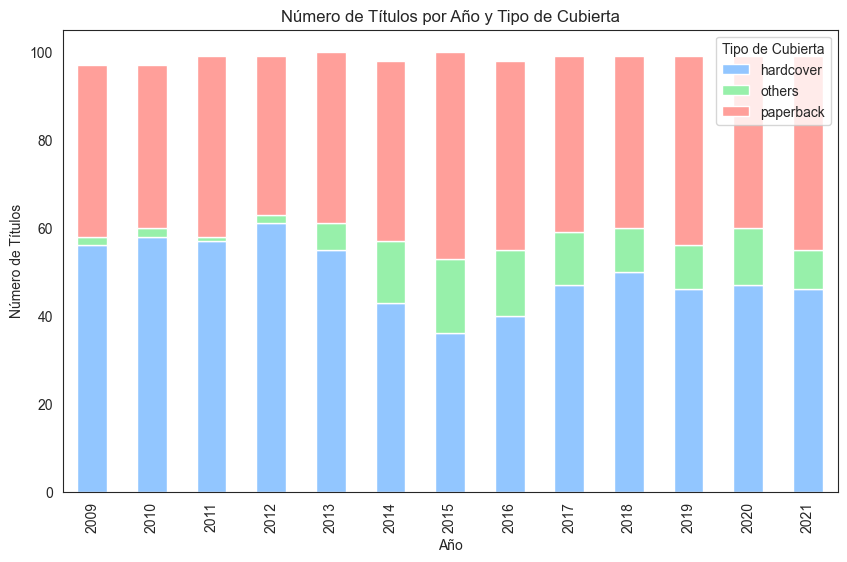

In [127]:
cover_year.plot(kind='bar', stacked=True, figsize=(10, 6))

# Añadir etiquetas y título
plt.title('Número de Títulos por Año y Tipo de Cubierta')
plt.xlabel('Año')
plt.ylabel('Número de Títulos')
plt.legend(title='Tipo de Cubierta')

# Mostrar el gráfico
plt.show()

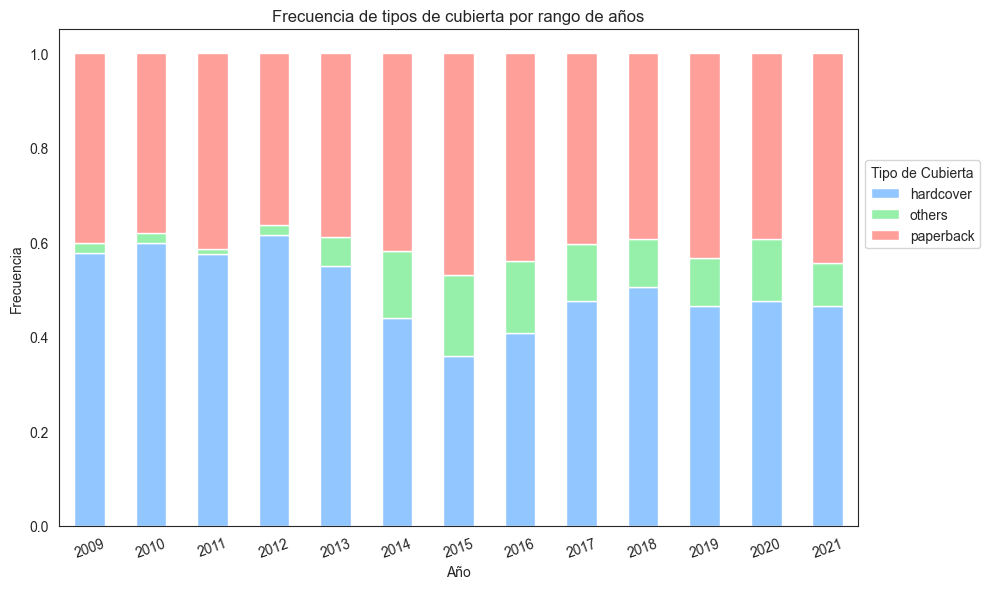

In [137]:
cover_year_freq.plot(kind='bar', stacked=True, figsize=(10, 6))

# Añadir etiquetas y título
plt.title('Frecuencia de tipos de cubierta por rango de años')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.xticks(rotation=20)
plt.legend(title='Tipo de Cubierta',bbox_to_anchor=[1, 0.75], loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [141]:
category_year = df_am.groupby(["year","category_top_10amazon"])["title"].count().unstack()

In [239]:
category_year.head(2)

category_top_10amazon,biographies & memoirs,children's ebooks,"cookbooks, food & wine",fiction,juvenile fiction,"mystery, thriller & suspense",non fiction,others,parenting & relationships,politics & social sciences,science & math
year,,,,,,,,,,,
2009,1.0,2.0,3.0,12.0,4.0,9.0,13.0,47.0,NaN,5.0,1.0
2010,7.0,1.0,1.0,11.0,3.0,5.0,22.0,41.0,NaN,4.0,2.0


In [143]:
category_year_freq = category_year.div(category_year.sum(axis=1, skipna=True), axis=0)


In [144]:
category_year_freq

category_top_10amazon,biographies & memoirs,children's ebooks,"cookbooks, food & wine",fiction,juvenile fiction,"mystery, thriller & suspense",non fiction,others,parenting & relationships,politics & social sciences,science & math
year,,,,,,,,,,,
2009,0.010309,0.020619,0.030928,0.123711,0.041237,0.092784,0.134021,0.484536,NaN,0.051546,0.010309
2010,0.072165,0.010309,0.010309,0.113402,0.030928,0.051546,0.226804,0.422680,NaN,0.041237,0.020619
2011,0.040404,0.040404,NaN,0.161616,0.010101,0.050505,0.222222,0.424242,0.020202,NaN,0.030303
2012,0.040404,0.050505,NaN,0.313131,NaN,NaN,0.333333,0.191919,0.020202,NaN,0.050505
2013,0.060000,0.080000,0.020000,0.290000,NaN,NaN,0.290000,0.220000,0.020000,NaN,0.020000
2014,0.040816,0.153061,0.010204,0.306122,0.010204,NaN,0.214286,0.244898,0.020408,NaN,NaN
2015,0.020000,0.160000,0.010000,0.240000,0.010000,NaN,0.380000,0.130000,0.030000,NaN,0.020000
2016,0.040816,0.173469,0.010204,0.295918,NaN,NaN,0.306122,0.132653,NaN,NaN,0.040816
2017,0.060606,0.131313,NaN,0.202020,NaN,NaN,0.323232,0.262626,0.010101,NaN,0.010101


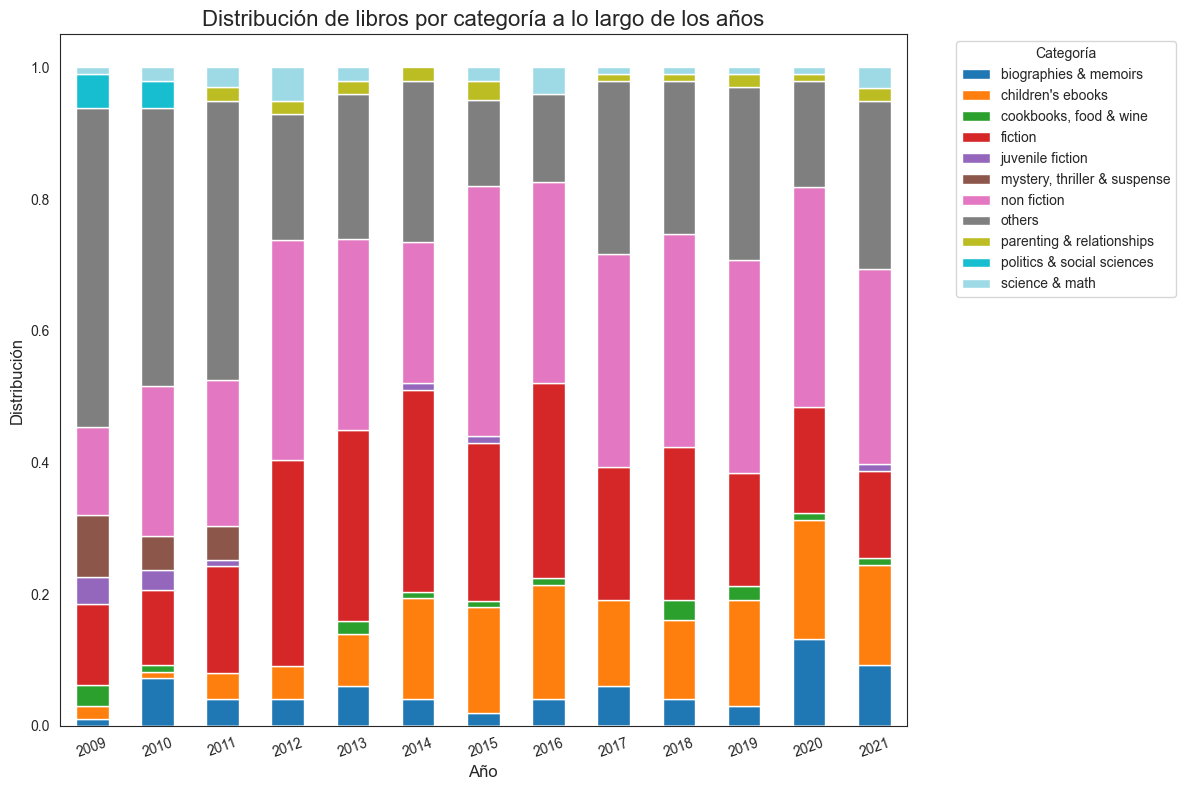

In [147]:
category_year_freq.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Distribución de libros por categoría a lo largo de los años', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Distribución', fontsize=12)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

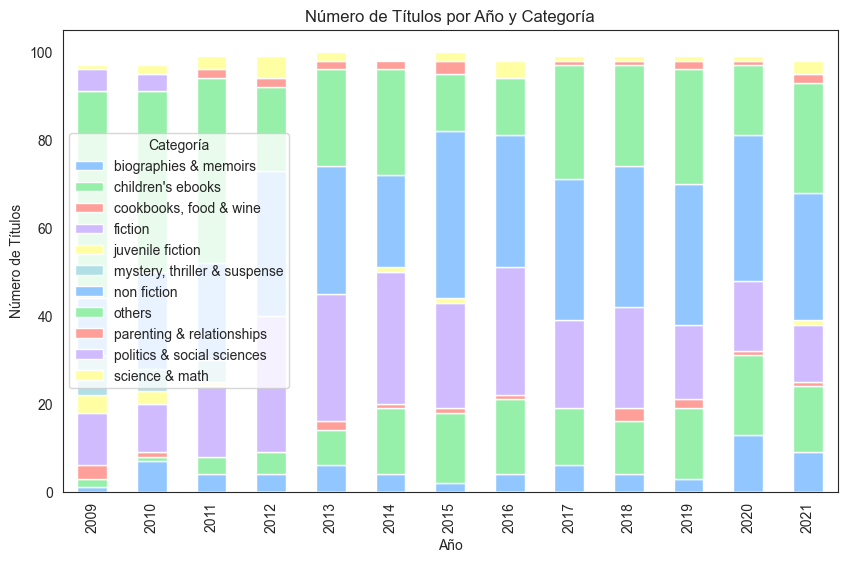

In [148]:
category_year.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Número de Títulos por Año y Categoría')
plt.xlabel('Año')
plt.ylabel('Número de Títulos')
plt.legend(title='Categoría')
plt.show()

In [240]:
df_am.drop_duplicates(subset="title", inplace= True)

In [246]:
len(df_am)

742

In [241]:
category_cover = df_am.groupby(["category_top_10amazon","cover_type_res"])["title"].count().unstack()
category_cover_freq = category_cover.div(category_cover.sum(axis=1, skipna=True), axis=0)

In [261]:
category_cover.sum().sum()

np.float64(741.0)

In [260]:
category_cover

cover_type_res,hardcover,others,paperback
category_top_10amazon,,,
biographies & memoirs,43.0,NaN,8.0
children's ebooks,27.0,9.0,11.0
"cookbooks, food & wine",7.0,NaN,6.0
fiction,100.0,14.0,50.0
juvenile fiction,8.0,1.0,NaN
"mystery, thriller & suspense",13.0,NaN,2.0
non fiction,98.0,12.0,91.0
others,132.0,4.0,74.0
parenting & relationships,5.0,NaN,3.0


In [242]:
category_cover_freq

cover_type_res,hardcover,others,paperback
category_top_10amazon,,,
biographies & memoirs,0.843137,NaN,0.156863
children's ebooks,0.574468,0.191489,0.234043
"cookbooks, food & wine",0.538462,NaN,0.461538
fiction,0.609756,0.085366,0.304878
juvenile fiction,0.888889,0.111111,NaN
"mystery, thriller & suspense",0.866667,NaN,0.133333
non fiction,0.487562,0.059701,0.452736
others,0.628571,0.019048,0.352381
parenting & relationships,0.625000,NaN,0.375000


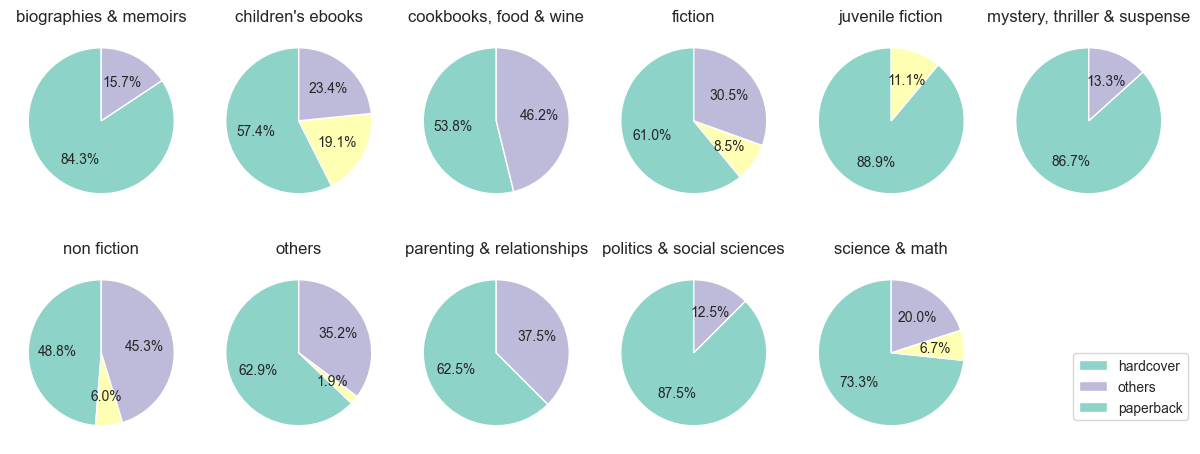

In [253]:
colors = plt.cm.Set3.colors
fig, axes = plt.subplots(2, 6, figsize=(12, 5))
axes = axes.flatten()

# Definir las etiquetas para los tipos de cubierta (todos los posibles)
labels = category_cover_freq.columns
# Graficar un pie chart por categoría (género)
for i, (genre, row) in enumerate(category_cover_freq.iterrows()):
    # Filtrar valores no nulos
    row_filtered = row.dropna()
    labels_filtered = row_filtered.index

    # Obtener los índices de las etiquetas no nulas para asignar colores correspondientes
    color_indices = [list(labels).index(label) for label in labels_filtered]

    # Evitar la fila si tiene todos ceros o solo NaN
    if row_filtered.sum() > 0:
        axes[i].pie(row_filtered, 
                    autopct='%1.1f%%', 
                    startangle=90, 
                    colors=[colors[idx] for idx in color_indices])  # Usar colores consistentes
        axes[i].set_title(genre)
fig.legend(labels, loc='center right', bbox_to_anchor=(1, 0.2), ncol=1)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

A partir de aquí vamos a ver la relación entre los 3 dataset, buscando los títulos compartidos.

In [152]:
# titulos iguales entre kindle y audible
tit_kindle = df_kd_h1["title"].unique()
tit_audible = df_audible["title"].unique()
titulos_iguales_kau = [x for x in tit_audible if x in tit_kindle]

In [153]:
len(titulos_iguales_kau)

201

In [154]:
# titulos iguales entre kindle y amazon
tit_kindle = df_kd_h1["title"].unique()
tit_amazon = df_am["title"].unique()
titulos_iguales_kam = [x for x in tit_amazon if x in tit_kindle]

In [155]:
len(titulos_iguales_kam)

277

In [156]:
# titulos iguales entre audible y amazon
tit_audible = df_audible["title"].unique()
tit_amazon = df_am["title"].unique()
titulos_iguales_auam = [x for x in tit_amazon if x in tit_audible]

In [157]:
len(titulos_iguales_auam)

36

In [158]:
# titulos iguales entre las tres plataformas
titulos_3platforms = [x for x in tit_kindle if x in titulos_iguales_auam]

In [159]:
len(titulos_3platforms)

27

In [160]:
titulos_compartidos3 = df_am[df_am["title"].isin(titulos_3platforms)]

In [161]:
titulos_compartidos3

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre,category_top_10,category_top_10_bd,category_combined,cover_type_res,category_top_10amazon
56,6.99,59.0,the book thief,34536.0,4.7,markus zusak,paperback,2009,fiction,children's ebooks,others,children's ebooks,paperback,children's ebooks
115,13.80,19.0,life,4699.0,4.6,keith richards,hardcover,2010,non fiction,biographies & memoirs,others,biographies & memoirs,hardcover,biographies & memoirs
120,14.19,24.0,the immortal life of henrietta lacks,16936.0,4.7,rebecca skloot,hardcover,2010,non fiction,science & math,others,science & math,hardcover,science & math
186,6.99,91.0,the book thief,34536.0,4.7,markus zusak,paperback,2010,fiction,children's ebooks,others,children's ebooks,paperback,children's ebooks
194,17.33,1.0,steve jobs,12780.0,4.7,walter isaacson,hardcover,2011,non fiction,biographies & memoirs,NaN,biographies & memoirs,hardcover,biographies & memoirs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,9.98,79.0,people we meet on vacation,46725.0,4.3,emily henry,paperback,2021,fiction,others,NaN,others,paperback,others
1264,11.99,82.0,man's search for meaning,53306.0,4.7,viktor e. frankl,paperback,2021,non fiction,biographies & memoirs,NaN,biographies & memoirs,paperback,biographies & memoirs
1269,9.49,87.0,the outsiders,30584.0,4.8,s. e. hinton,paperback,2021,fiction,children's ebooks,NaN,children's ebooks,paperback,children's ebooks
1275,16.53,93.0,a promised land,125017.0,4.9,barack obama,hardcover,2021,non fiction,biographies & memoirs,NaN,biographies & memoirs,hardcover,biographies & memoirs


In [162]:
filtered_audible = df_audible[df_audible['title'].isin(titulos_3platforms)]

In [163]:
filtered_audible.head(2)

,title,categories,author,narrated_by,series,length_(hours),length_(minutes),releasedate,price,ratings,overall_rating_out_of_5,performance_rating_out_of_5,story_rating_out_of_5,published_year,year_range,category_top_10
109,the perks of being a wallflower,teen & young adult,stephen chbosky,noah galvin,nan,6,23.0,9/19/2017,14.99,3820,4.8,4.8,4.8,2017,2015-2019,teen & young adult
127,turtles all the way down,teen & young adult,john green,kate rudd,nan,7,12.0,10/10/2017,20.70,10927,4.4,4.5,4.4,2017,2015-2019,teen & young adult


In [164]:
filtered_audible["ratings"] = filtered_audible["ratings"].astype(float)

C:\Users\anusk\AppData\Local\Temp\ipykernel_24260\1391765100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_audible["ratings"] = filtered_audible["ratings"].astype(float)


In [165]:
filtered_audible.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 109 to 2339
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   title                        39 non-null     object  
 1   categories                   39 non-null     object  
 2   author                       39 non-null     object  
 3   narrated_by                  39 non-null     object  
 4   series                       39 non-null     object  
 5   length_(hours)               39 non-null     int64   
 6   length_(minutes)             38 non-null     float64 
 7   releasedate                  39 non-null     object  
 8   price                        39 non-null     float64 
 9   ratings                      39 non-null     float64 
 10  overall_rating_out_of_5      39 non-null     float64 
 11  performance_rating_out_of_5  39 non-null     float64 
 12  story_rating_out_of_5        39 non-null     float64 
 13  publishe

In [222]:
df_audible["ratings"] = np.where(df_audible["ratings"] == "not rated", 0, df_audible["ratings"])

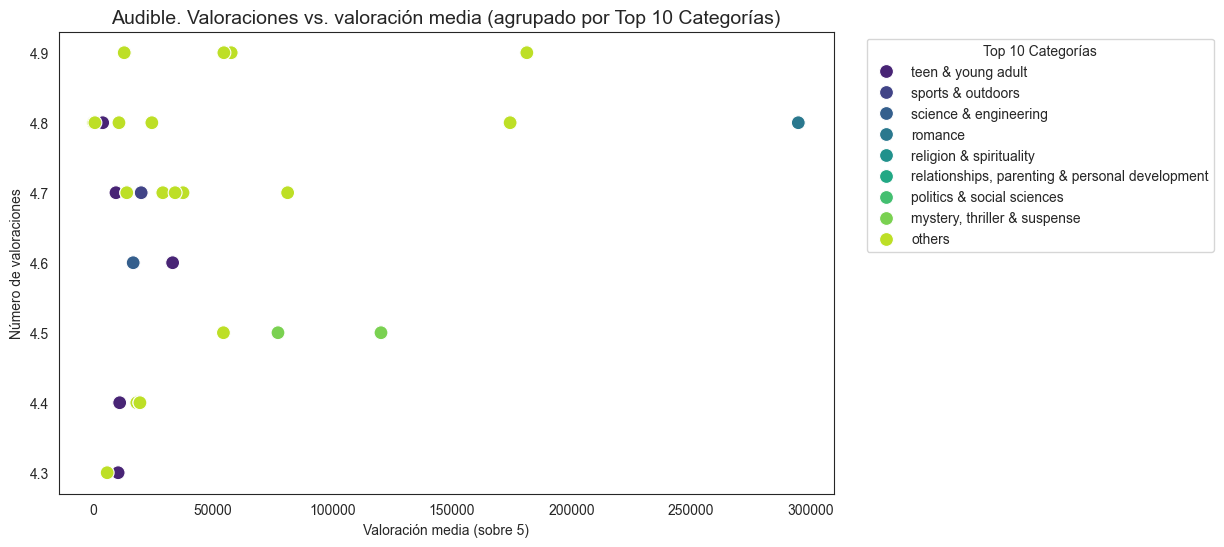

In [178]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_audible, x='ratings', y='overall_rating_out_of_5', hue='category_top_10', palette='viridis', s=100)

plt.title('Audible. Valoraciones vs. valoración media (agrupado por Top 10 Categorías)', fontsize=14)
plt.xlabel('Valoración media (sobre 5)')
plt.ylabel('Número de valoraciones')
plt.legend(title='Top 10 Categorías', loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()

In [224]:
# Convertir a numérico, forzando errores a NaN
df_audible['ratings'] = pd.to_numeric(df_audible['ratings'], errors='coerce')

# Eliminar filas donde 'ratings' sea NaN
df_audible = df_audible.dropna(subset=['ratings'])

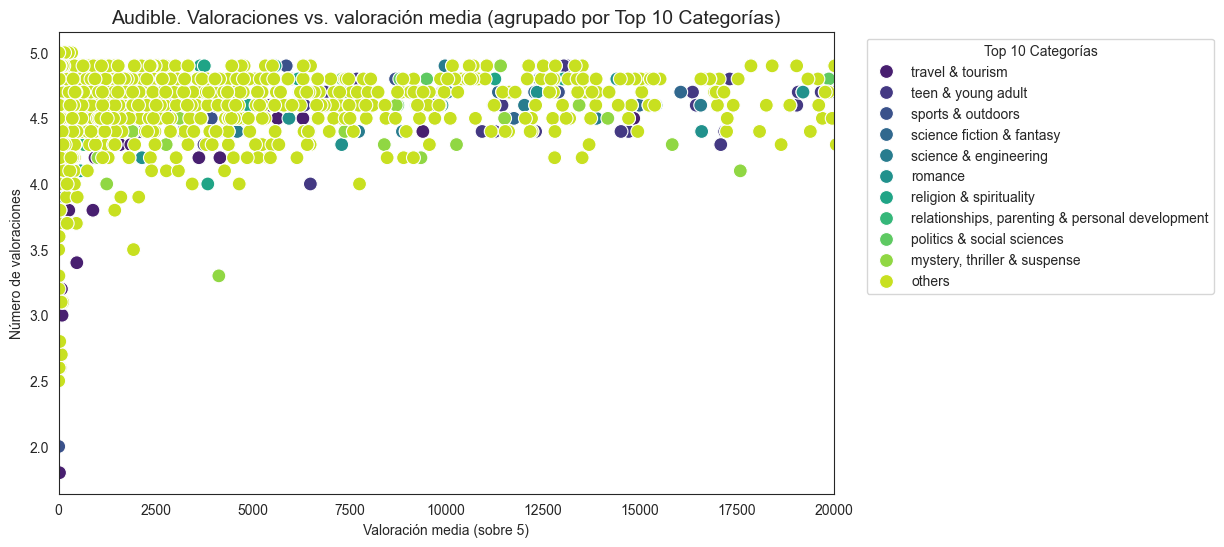

In [230]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_audible, x='ratings', y='overall_rating_out_of_5', hue='category_top_10', palette='viridis', s=100)
plt.xlim(0,20000)
plt.title('Audible. Valoraciones vs. valoración media (agrupado por Top 10 Categorías)', fontsize=14)
plt.xlabel('Valoración media (sobre 5)')
plt.ylabel('Número de valoraciones')
plt.legend(title='Top 10 Categorías', loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()

In [181]:
filtered_kindle = df_kd_h1[df_kd_h1['title'].isin(titulos_3platforms)]

In [182]:
filtered_kindle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 2510 to 66503
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   asin                                  27 non-null     object  
 1   title                                 27 non-null     object  
 2   author                                27 non-null     object  
 3   soldby                                24 non-null     object  
 4   stars                                 27 non-null     float64 
 5   reviews                               27 non-null     int64   
 6   price                                 27 non-null     float64 
 7   iskindleunlimited                     27 non-null     bool    
 8   isbestseller                          27 non-null     bool    
 9   publisheddate                         27 non-null     object  
 10  category_name                         27 non-null     object  
 11  publish

In [183]:
filtered_kindle

,asin,title,author,soldby,stars,reviews,price,iskindleunlimited,isbestseller,publisheddate,...,ranking_science & math,ranking_others,ranking_biographies & memoirs,"ranking_crafts, hobbies & home",ranking_travel,ranking_parenting & relationships,ranking_law,ranking_engineering & transportation,"ranking_cookbooks, food & wine",ranking_computers & technology
2510,b000qjlqzi,alexander hamilton,ron chernow,penguin group (usa) llc,4.7,31882,14.99,False,False,2005-03-29,...,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2775,014240733x,the outsiders,s. e. hinton,NaN,4.8,0,5.98,False,False,2006-04-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2855,b009u9s6fi,man's search for meaning,viktor e. frankl,penguin random house publisher services,4.7,83522,9.99,False,True,2006-06-01,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3334,0375842209,the book thief,markus zusak,NaN,4.6,0,7.83,False,True,2007-09-11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6364,b0028mbkvg,born to run,christopher mcdougall,random house llc,4.7,24095,12.99,False,False,2009-05-05,...,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7229,b003tseedy,the perks of being a wallflower,stephen chbosky,simon and schuster digital sales inc,4.7,38762,11.99,False,False,2010-06-29,...,NaN,151.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7955,b003ubtx72,life,keith richards,hachette book group,4.5,7302,11.99,False,False,2010-10-26,...,NaN,NaN,249.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8786,b00338qeni,the immortal life of henrietta lacks,rebecca skloot,random house llc,4.6,0,14.99,False,False,2010-02-02,...,441.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10140,b004w2ubyw,steve jobs,walter isaacson,simon and schuster digital sales inc,4.7,23594,16.99,False,False,2011-10-23,...,NaN,NaN,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8860,b00555x8oa,"thinking, fast and slow",daniel kahneman,macmillan,4.6,0,12.99,True,False,2011-10-25,...,468.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


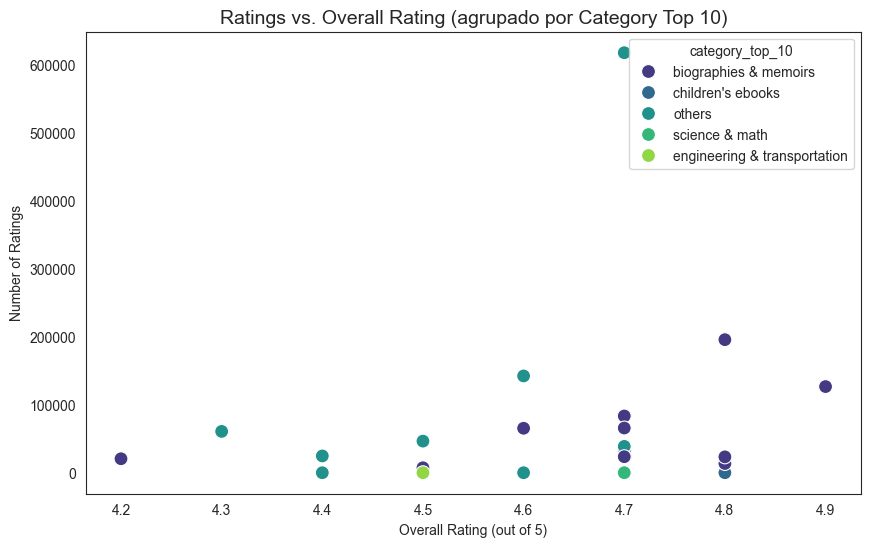

In [184]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_kindle, x='stars', y='reviews', hue='category_top_10', palette='viridis', s=100)

# Añadir etiquetas y título
plt.title('Ratings vs. Overall Rating (agrupado por Category Top 10)', fontsize=14)
plt.xlabel('Overall Rating (out of 5)')
plt.ylabel('Number of Ratings')

# Mostrar el gráfico
plt.show()

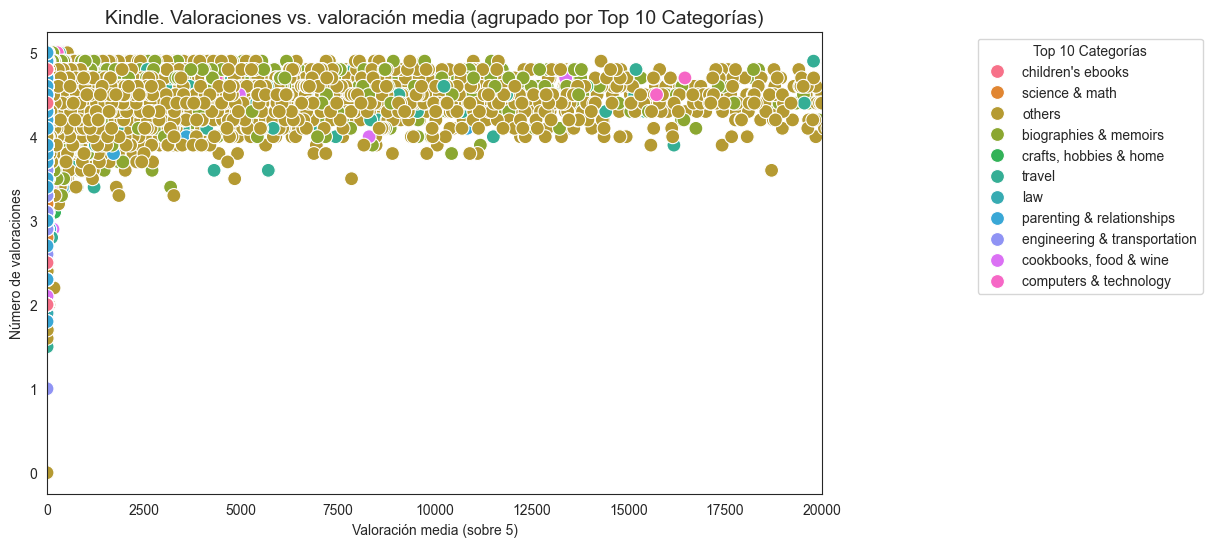

In [228]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_kd_h1, y='stars', x='reviews', hue='category_top_10', s=100)

plt.title('Kindle. Valoraciones vs. valoración media (agrupado por Top 10 Categorías)', fontsize=14)
plt.xlim(0,20000)
plt.xlabel('Valoración media (sobre 5)')
plt.ylabel('Número de valoraciones')
plt.legend(title='Top 10 Categorías', loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()

In [185]:
filtered_amazon = df_am[df_am['title'].isin(titulos_3platforms)]

In [237]:
filtered_amazon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 1087 to 478
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  27 non-null     float64
 1   ranks                  27 non-null     float64
 2   title                  27 non-null     object 
 3   no_of_reviews          27 non-null     float64
 4   ratings                27 non-null     float64
 5   author                 27 non-null     object 
 6   cover_type             27 non-null     object 
 7   year                   27 non-null     int64  
 8   genre                  27 non-null     object 
 9   category_top_10        27 non-null     object 
 10  category_top_10_bd     4 non-null      object 
 11  category_combined      27 non-null     object 
 12  cover_type_res         27 non-null     object 
 13  category_top_10amazon  27 non-null     object 
dtypes: float64(4), int64(1), object(9)
memory usage: 3.2+ KB


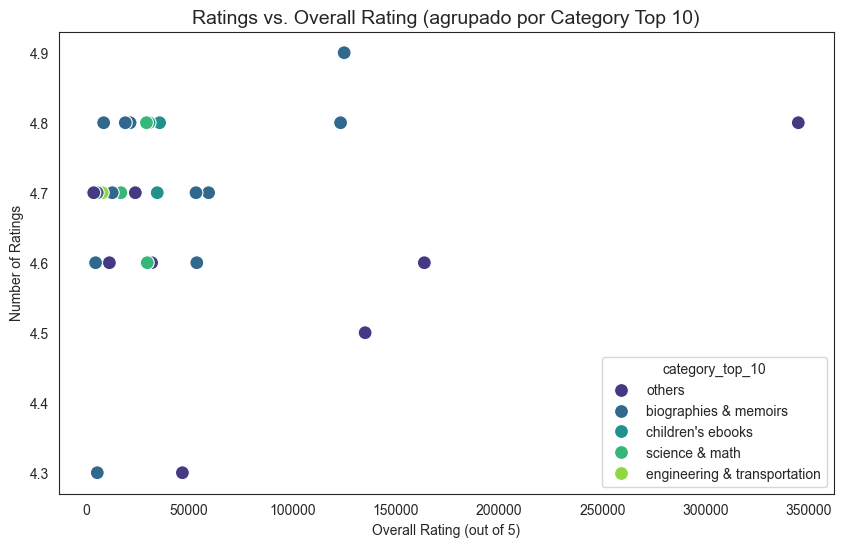

In [200]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_amazon, x='no_of_reviews', y='ratings', hue='category_top_10', palette='viridis', s=100)

# Añadir etiquetas y título
plt.title('Ratings vs. Overall Rating (agrupado por Category Top 10)', fontsize=14)
plt.xlabel('Overall Rating (out of 5)')
plt.ylabel('Number of Ratings')

# Mostrar el gráfico
plt.show()

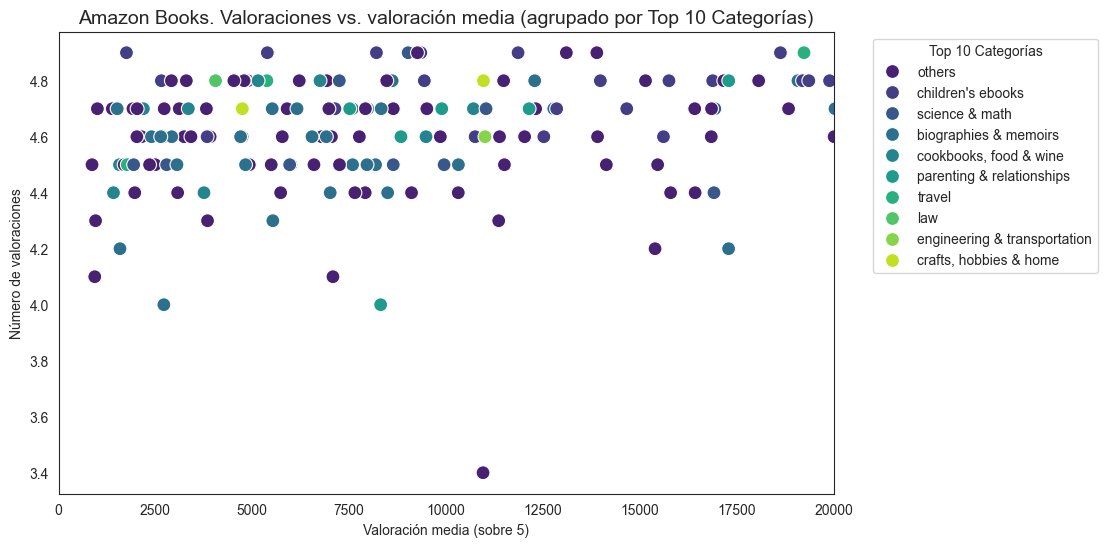

In [245]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_am, y='ratings', x='no_of_reviews', hue='category_top_10', palette='viridis', s=100)

plt.title('Amazon Books. Valoraciones vs. valoración media (agrupado por Top 10 Categorías)', fontsize=14)
plt.xlim(0,20000)
plt.xlabel('Valoración media (sobre 5)')
plt.ylabel('Número de valoraciones')
plt.legend(title='Top 10 Categorías', loc='upper right', bbox_to_anchor=(1.35, 1))
plt.show()

In [188]:
filtered_amazon = filtered_amazon[filtered_amazon['category_combined'].notna()]

In [189]:
filtered_amazon = filtered_amazon.sort_values('no_of_reviews', ascending=False).drop_duplicates(subset='title', keep='first')

In [190]:
filtered_amazon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 1087 to 478
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  27 non-null     float64
 1   ranks                  27 non-null     float64
 2   title                  27 non-null     object 
 3   no_of_reviews          27 non-null     float64
 4   ratings                27 non-null     float64
 5   author                 27 non-null     object 
 6   cover_type             27 non-null     object 
 7   year                   27 non-null     int64  
 8   genre                  27 non-null     object 
 9   category_top_10        27 non-null     object 
 10  category_top_10_bd     4 non-null      object 
 11  category_combined      27 non-null     object 
 12  cover_type_res         27 non-null     object 
 13  category_top_10amazon  27 non-null     object 
dtypes: float64(4), int64(1), object(9)
memory usage: 3.2+ KB


In [191]:
filtered_amazon.head(2)

,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre,category_top_10,category_top_10_bd,category_combined,cover_type_res,category_top_10amazon
1087,12.39,3.0,where the crawdads sing,344811.0,4.8,delia owens,hardcover,2020,fiction,others,NaN,others,hardcover,others
1258,17.40,76.0,verity,163818.0,4.6,colleen hoover,paperback,2021,fiction,others,NaN,others,paperback,others


Hipótesis 3: El formato de publicación del libro no afecta al número de reseñas recibidas

Ahora vamos a comprobar el número total de reviews por género

In [192]:
reviews_top10kd = filtered_kindle.groupby("category_top_10")["reviews"].sum().reset_index(name='total_reviews')

In [193]:
reviews_top10kd = reviews_top10kd.sort_values(by="total_reviews", ascending=False)

In [194]:
reviews_top10kd 

,category_top_10,total_reviews
3,others,931533
0,biographies & memoirs,681805
1,children's ebooks,0
2,engineering & transportation,0
4,science & math,0


In [195]:
reviews_top10aud = filtered_audible.groupby("category_top_10")["ratings"].sum().reset_index(name='total_reviews')
reviews_top10aud = reviews_top10aud.sort_values(by="total_reviews", ascending=False)

In [196]:
reviews_top10aud

,category_top_10,total_reviews
1,others,933629.0
5,romance,433345.0
2,politics & social sciences,235885.0
0,"mystery, thriller & suspense",197479.0
3,"relationships, parenting & personal development",174335.0
8,teen & young adult,67471.0
6,science & engineering,30463.0
7,sports & outdoors,19918.0
4,religion & spirituality,71.0


In [197]:
reviews_top10am = filtered_amazon.groupby("category_top_10")["no_of_reviews"].sum().reset_index(name='total_reviews')
reviews_top10am = reviews_top10am.sort_values(by="total_reviews", ascending=False)

In [198]:
reviews_top10am

,category_top_10,total_reviews
3,others,761464.0
0,biographies & memoirs,492305.0
1,children's ebooks,100818.0
4,science & math,76004.0
2,engineering & transportation,7924.0


In [170]:
# # para eliminar todos los ebooks con 20 reviews o menos.
# df.drop(df[df["reviews"] <= 20].index, inplace=True)

In [171]:
# df["reviews"].value_counts()

In [172]:
# df_kindle_ranking[df_kindle_ranking["ranking_" + str(categorie)] > 100].index

In [173]:
# para eliminar todos los libros que no estén en el ranking 100 de su categoría
# for categorie in categories:
#     df_kindle_ranking.drop(df_kindle_ranking[df_kindle_ranking["ranking_" + str(categorie)] > 100].index, inplace=True)

In [174]:
# df_kindle_ranking.describe()

In [175]:
# df_kindle_ranking.info()

In [176]:
# df_kindle_ranking.columns

In [177]:
# Creacion de nuevo dataframe con los 500 ebooks con más reviews.
# df_kindle_500 = df_kindle_ranking.sort_values(by= ["reviews"], ascending=False)[0:500].copy()


In [178]:
# df_kindle_500

In [179]:
# creación de nuevo dataframe filtrando por aquellos ebook son bestseller según la columna isBestSeller
# df_kindle_bestseller = df_kindle_ranking[df_kindle_ranking["isBestSeller"] == True].copy()

In [180]:
# # creación de un ranking según el número de reviews por categoría.
# categories = df["category_name"].unique()
# df_ranking = df.copy()
# for categorie in categories:
#     print(categorie)
#     df_categorie = df[df["category_name"] == categorie].copy()
#     df_categorie = df_categorie.sort_values(by= ["reviews"], ascending= False)
#     df_categorie["ranking_" + str(categorie)] = range(1, len(df_categorie) + 1)
#     df_ranking = pd.merge(df_ranking,df_categorie, how="left")

# # para eliminar todos los libros que no estén en el ranking 100 de su categoría
# for categorie in categories:
#     df_ranking.drop(df_ranking[df_ranking["ranking_" + str(categorie)] > 100].index, inplace=True)

# df.to_csv("../data/a_kindle100cat.csv")